<div class="alert alert-info">
    <h1 align="center">CPT analysis</h1> 
    <h3 align="center"> Prepared by Ali Golchin</h3>
    <h5 align="center">Section of Geo-Engineering, Global Engineering, Offshore Energy division, Boskalis </h5>
</div>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import python_ags4
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px
import python_ags4
import striplog
import contextily as cx
import matplotlib.colors as mcolors
from python_ags4 import AGS4
from shapely.geometry import Point
from pyproj.transformer import Transformer
from python_ags4 import AGS4
from striplog import Legend, Lexicon, Interval, Component, Striplog
from matplotlib.ticker import MultipleLocator
import pygeos
import os
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import gridspec
import math
import seaborn as sns
import plotly.graph_objs as go
from tabulate import tabulate

# CPT analysis

## Robertson charts info: Qt - Fr

In [3]:
PATH_DIGI_DATA = 'C:/Ali/CPT/Chart digitized/'
File_name      = 'R_chart_lines.xlsx'

# collecting data points of boundaries
DL1_1 = pd.read_excel(PATH_DIGI_DATA + File_name, sheet_name="L1-1");
DL1_2 = pd.read_excel(PATH_DIGI_DATA + File_name, sheet_name="L1-2");
DL1_3 = pd.read_excel(PATH_DIGI_DATA + File_name, sheet_name="L1-3");
DL1_4 = pd.read_excel(PATH_DIGI_DATA + File_name, sheet_name="L1-4");
DL2   = pd.read_excel(PATH_DIGI_DATA + File_name, sheet_name="L2");
DL3   = pd.read_excel(PATH_DIGI_DATA + File_name, sheet_name="L3");
DL5   = pd.read_excel(PATH_DIGI_DATA + File_name, sheet_name="L5");
DL6   = pd.read_excel(PATH_DIGI_DATA + File_name, sheet_name="L6");
DL7   = pd.read_excel(PATH_DIGI_DATA + File_name, sheet_name="L7");
DL8_1 = pd.read_excel(PATH_DIGI_DATA + File_name, sheet_name="L8-1");
DL8_2 = pd.read_excel(PATH_DIGI_DATA + File_name, sheet_name="L8-2");
DL9_1 = pd.read_excel(PATH_DIGI_DATA + File_name, sheet_name="L9-1");
DL9_2 = pd.read_excel(PATH_DIGI_DATA + File_name, sheet_name="L9-2");
DL9_3 = pd.read_excel(PATH_DIGI_DATA + File_name, sheet_name="L9-3");
DLNC  = pd.read_excel(PATH_DIGI_DATA + File_name, sheet_name="LNC");
DCoor = pd.read_excel(PATH_DIGI_DATA + File_name, sheet_name="Coordinates");

# collecting data points to form zones
# Zone 1:
DZ1 = np.vstack((DL1_1, DL1_2, DL1_3, DL1_4, [[DCoor['x'][0], DCoor['y'][0]]], [DL1_1['x'][0], DL1_1['y'][0]]))
# Zone 2:
DZ2 = np.vstack((DL1_4, [[DCoor['x'][1], DCoor['y'][1]]], DL2[::-1], [DL1_4['x'][0], DL1_4['y'][0]]))
# Zone 3:
DZ3 = np.vstack((DL1_3, DL2, DL9_3[::-1], DL3[::-1], [DL1_3['x'][0], DL1_3['y'][0]]))
# Zone 4:
DZ4 = np.vstack((DL3, DL9_2[::-1], DL5[::-1], DL1_2, [DL3['x'][0], DL3['y'][0]]))
# Zone 5:
DZ5 = np.vstack((DL5, DL8_2[::-1], DL6[::-1], DL1_1, [DL5['x'][0], DL5['y'][0]]))
# Zone 6:
DZ6 = np.vstack((DL6, DL8_1[::-1], DL7[::-1], [DL6['x'][0], DL6['y'][0]]))
# Zone 7:
DZ7 = np.vstack((DL7, [[DCoor['x'][3], DCoor['y'][3]]], [DL7['x'][0], DL7['y'][0]]))
# Zone 8:
DZ8 = np.vstack((DL8_1, DL8_2, DL9_1[::-1], [DL8_1['x'][0], DL8_1['y'][0]]))
# Zone 9:
DZ9 = np.vstack((DL9_1, DL9_2, DL9_3, [[DCoor['x'][2], DCoor['y'][2]]], [DL9_1['x'][0], DL9_1['y'][0]]))
# Zone NC:
DZNC = np.vstack((DLNC, [DLNC['x'][0], DLNC['y'][0]]))

# Forming the zones
# Zone 1:
dDZ1 = str(list(zip(DZ1[:,0], DZ1[:,1]))).replace(',', ''); dDZ1_1 = dDZ1.replace(') (', ', ')[1:-1]
Z1   = pygeos.Geometry("POLYGON"+"("+(dDZ1_1)+")")
# Zone 2:
dDZ2 = str(list(zip(DZ2[:,0], DZ2[:,1]))).replace(',', ''); dDZ2_1 = dDZ2.replace(') (', ', ')[1:-1]
Z2   = pygeos.Geometry("POLYGON"+"("+(dDZ2_1)+")")
# Zone 3:
dDZ3 = str(list(zip(DZ3[:,0], DZ3[:,1]))).replace(',', ''); dDZ3_1 = dDZ3.replace(') (', ', ')[1:-1]
Z3   = pygeos.Geometry("POLYGON"+"("+(dDZ3_1)+")")
# Zone 4:
dDZ4 = str(list(zip(DZ4[:,0], DZ4[:,1]))).replace(',', ''); dDZ4_1 = dDZ4.replace(') (', ', ')[1:-1]
Z4   = pygeos.Geometry("POLYGON"+"("+(dDZ4_1)+")")
# Zone 5:
dDZ5 = str(list(zip(DZ5[:,0], DZ5[:,1]))).replace(',', ''); dDZ5_1 = dDZ5.replace(') (', ', ')[1:-1]
Z5   = pygeos.Geometry("POLYGON"+"("+(dDZ5_1)+")")
# Zone 6:
dDZ6 = str(list(zip(DZ6[:,0], DZ6[:,1]))).replace(',', ''); dDZ6_1 = dDZ6.replace(') (', ', ')[1:-1]
Z6   = pygeos.Geometry("POLYGON"+"("+(dDZ6_1)+")")
# Zone 7:
dDZ7 = str(list(zip(DZ7[:,0], DZ7[:,1]))).replace(',', ''); dDZ7_1 = dDZ7.replace(') (', ', ')[1:-1]
Z7   = pygeos.Geometry("POLYGON"+"("+(dDZ7_1)+")")
# Zone 8:
dDZ8 = str(list(zip(DZ8[:,0], DZ8[:,1]))).replace(',', ''); dDZ8_1 = dDZ8.replace(') (', ', ')[1:-1]
Z8   = pygeos.Geometry("POLYGON"+"("+(dDZ8_1)+")")
# Zone 9:
dDZ9 = str(list(zip(DZ9[:,0], DZ9[:,1]))).replace(',', ''); dDZ9_1 = dDZ9.replace(') (', ', ')[1:-1]
Z9   = pygeos.Geometry("POLYGON"+"("+(dDZ9_1)+")")
# Zone NC:
dDNC = str(list(zip(DZNC[:,0], DZNC[:,1]))).replace(',', ''); dDNC_1 = dDNC.replace(') (', ', ')[1:-1]
ZNC  = pygeos.Geometry("POLYGON"+"("+(dDNC_1)+")")


## Robertson charts info: Qt - Bq

In [4]:
File_name1 = 'Bq_chart_data.xlsx'

# collecting data points of boundaries
DLu1   = pd.read_excel(PATH_DIGI_DATA + File_name1, sheet_name="L1");
DLu2   = pd.read_excel(PATH_DIGI_DATA + File_name1, sheet_name="L2");
DLu3   = pd.read_excel(PATH_DIGI_DATA + File_name1, sheet_name="L3");
DLu4   = pd.read_excel(PATH_DIGI_DATA + File_name1, sheet_name="L4");
DLu5   = pd.read_excel(PATH_DIGI_DATA + File_name1, sheet_name="L5");
DLu6   = pd.read_excel(PATH_DIGI_DATA + File_name1, sheet_name="L6");

# collecting data points to form zones
# Zone 1:
DZu1 = pd.read_excel(PATH_DIGI_DATA + File_name1, sheet_name="Z1");
# Zone 2:
DZu2 = pd.read_excel(PATH_DIGI_DATA + File_name1, sheet_name="Z2");
# Zone 3:
DZu3 = pd.read_excel(PATH_DIGI_DATA + File_name1, sheet_name="Z3");
# Zone 4:
DZu4 = pd.read_excel(PATH_DIGI_DATA + File_name1, sheet_name="Z4");
# Zone 5:
DZu5 = pd.read_excel(PATH_DIGI_DATA + File_name1, sheet_name="Z5");
# Zone 6:
DZu6 = pd.read_excel(PATH_DIGI_DATA + File_name1, sheet_name="Z6");
# Zone 7:
DZu7 = pd.read_excel(PATH_DIGI_DATA + File_name1, sheet_name="Z7");


# Forming the zones
# Zone 1:
dDZu1 = str(list(zip(DZu1['x'], DZu1['y']))).replace(',', ''); dDZu1_1 = dDZu1.replace(') (', ', ')[1:-1]
Zu1   = pygeos.Geometry("POLYGON"+"("+(dDZu1_1)+")")
# Zone 2:
dDZu2 = str(list(zip(DZu2['x'], DZu2['y']))).replace(',', ''); dDZu2_1 = dDZu2.replace(') (', ', ')[1:-1]
Zu2   = pygeos.Geometry("POLYGON"+"("+(dDZu2_1)+")")
# Zone 3:
dDZu3 = str(list(zip(DZu3['x'], DZu3['y']))).replace(',', ''); dDZu3_1 = dDZu3.replace(') (', ', ')[1:-1]
Zu3   = pygeos.Geometry("POLYGON"+"("+(dDZu3_1)+")")
# Zone 4:
dDZu4 = str(list(zip(DZu4['x'], DZu4['y']))).replace(',', ''); dDZu4_1 = dDZu4.replace(') (', ', ')[1:-1]
Zu4   = pygeos.Geometry("POLYGON"+"("+(dDZu4_1)+")")
# Zone 5:
dDZu5 = str(list(zip(DZu5['x'], DZu5['y']))).replace(',', ''); dDZu5_1 = dDZu5.replace(') (', ', ')[1:-1]
Zu5   = pygeos.Geometry("POLYGON"+"("+(dDZu5_1)+")")
# Zone 6:
dDZu6 = str(list(zip(DZu6['x'], DZu6['y']))).replace(',', ''); dDZu6_1 = dDZu6.replace(') (', ', ')[1:-1]
Zu6   = pygeos.Geometry("POLYGON"+"("+(dDZu6_1)+")")
# Zone 7:
dDZu7 = str(list(zip(DZu7['x'], DZu7['y']))).replace(',', ''); dDZu7_1 = dDZu7.replace(') (', ', ')[1:-1]
Zu7   = pygeos.Geometry("POLYGON"+"("+(dDZu7_1)+")")


# Robertson charts: plotting boundaries

## Robertson (1990): Qt_Bq

In [5]:
def Robertson_1990_chart_QtBq(CPT_ID, Bq, Qtn):
    plt.title('Robertson et al. (1990) chart, updated by Robertson 2010' ,fontsize=12)
    plt.xlim(-0.6, 1.4)
    plt.yscale('log'), plt.ylim(1, 1000)
    plt.xlabel('Normalised pore pressure, $B_{q}$')
    plt.ylabel('Normalised cone resistance, $Q_{tn}$')

    # plotting the lines
    L1 = plt.plot(DLu1['x'], DLu1['y'], 'k', linewidth = LW);
    L2 = plt.plot(DLu2['x'], DLu2['y'], 'k', linewidth = LW); 
    L3 = plt.plot(DLu3['x'], DLu3['y'], 'k', linewidth = LW);
    L4 = plt.plot(DLu4['x'], DLu4['y'], 'k', linewidth = LW);
    L5 = plt.plot(DLu5['x'], DLu5['y'], 'k', linewidth = LW); 
    L6 = plt.plot(DLu6['x'], DLu6['y'], 'k', linewidth = LW);
    L7 = plt.plot([0, 0], [1, 1000], 'k', linewidth = LW);

    # adding texts
    plt.text(1.15, 1.5, "Z. 1", fontsize = FS, c = 'slategray')
    plt.text(0.45, 1.5, "Z. 2", fontsize = FS, c = 'slategray')
    plt.text(1.15,  10, "Z. 3", fontsize = FS, c = 'slategray')
    plt.text(0.40,  45, "Z. 4", fontsize = FS, c = 'slategray')
    plt.text(0.23,  60, "Z. 5", fontsize = FS, c = 'slategray')
    plt.text(0.02, 150, "Z. 6", fontsize = FS, c = 'slategray')
    plt.text(0.02, 400, "Z. 7", fontsize = FS, c = 'slategray')

    # plotting data
    plt.scatter(Bq, Qtn, linewidth = 1.5, facecolor = 'white', edgecolor = color_f, s = SIZE)


### Robertson (1990): Qt_Fr

In [6]:
def Robertson_1990_chart(CPT_ID, Fr, Qtn):
    #plt.suptitle('Log data: '+ str(CPT_ID[i]) ,fontsize=16)
    plt.title('Robertson et al. (1990) chart, updated by Robertson 2010' ,fontsize=12)
    plt.xscale('log'), plt.xlim(0.1, 10)
    plt.yscale('log'), plt.ylim(1, 1000)
    plt.xlabel('Normalised friction, $F_{r}$')
    plt.ylabel('Normalised cone resistance, $Q_{tn}$')

    # plotting the lines
    L1_1 = plt.plot(DL1_1['x'], DL1_1['y'], 'k', linewidth = LW); 
    L1_2 = plt.plot(DL1_2['x'], DL1_2['y'], 'k', linewidth = LW);
    L1_3 = plt.plot(DL1_3['x'], DL1_3['y'], 'k', linewidth = LW); 
    L1_4 = plt.plot(DL1_4['x'], DL1_4['y'], 'k', linewidth = LW);
    L2   = plt.plot(DL2['x']  , DL2['y']  , 'k', linewidth = LW); 
    L3   = plt.plot(DL3['x']  , DL3['y']  , 'k', linewidth = LW);
    L5   = plt.plot(DL5['x']  , DL5['y']  , 'k', linewidth = LW); 
    L6   = plt.plot(DL6['x']  , DL6['y']  , 'k', linewidth = LW);
    L7   = plt.plot(DL7['x']  , DL7['y']  , 'k', linewidth = LW); 
    L8_1 = plt.plot(DL8_1['x'], DL8_1['y'], 'k', linewidth = LW); 
    L8_2 = plt.plot(DL8_2['x'], DL8_2['y'], 'k', linewidth = LW);
    L9_1 = plt.plot(DL9_1['x'], DL9_1['y'], 'k', linewidth = LW); 
    L9_2 = plt.plot(DL9_2['x'], DL9_2['y'], 'k', linewidth = LW);
    L9_3 = plt.plot(DL9_3['x'], DL9_3['y'], 'k', linewidth = LW);
    LNC  = plt.plot(DLNC['x'] , DLNC['y'] , 'k--', linewidth = LW);

    # Normally-consolidated area hatching
    plt.rcParams['hatch.linewidth'] = 0.2
    plt.fill(np.append(DLNC['x'], DLNC['x'][0]), np.append(DLNC['y'], DLNC['y'][0]), 'dimgray',alpha=0.1, linestyle='--', hatch="/", linewidth = 0.3)

    # adding texts
    plt.text(0.2, 2,   "Z. 1", fontsize = FS, c = 'slategray')
    plt.text(6, 2,     "Z. 2", fontsize = FS, c = 'slategray')
    plt.text(1.5, 3,   "Z. 3", fontsize = FS, c = 'slategray')
    plt.text(0.6, 8,   "Z. 4", fontsize = FS, c = 'slategray')
    plt.text(0.2, 20,  "Z. 5", fontsize = FS, c = 'slategray')
    plt.text(0.2, 80,  "Z. 6", fontsize = FS, c = 'slategray')
    plt.text(0.2, 500, "Z. 7", fontsize = FS, c = 'slategray')
    plt.text(3, 500,   "Z. 8", fontsize = FS, c = 'slategray')
    plt.text(6, 500,   "Z. 9", fontsize = FS, c = 'slategray')
    plt.text(x_loc_t, y_loc_t, "Normally consolidated", rotation = angle, va = 'center', fontsize = FS2, c = 'k')

    # plotting data
    plt.scatter(Fr, Qtn, linewidth = 1.5, facecolor = 'white', edgecolor = color_f, s = SIZE)



## Determining the  properties (sand or clay) of each data point

In [10]:
#COLOR_Fr = ['gray', 'brown', 'red', 'coral', 'darkcyan', 'royalblue', 'navy', 'darkslategray', 'maroon', 'gold']
#COLOR_Bq = ['gray', 'brown', 'red', 'coral', 'darkcyan', 'royalblue', 'navy', 'gold']
COLOR_Fr = ['#8B8378', '#EE7621', '#CDAA7D', '#FFB90F', '#00CED1', '#00B2EE', '#0000FF', '#000080', '#4B0082', '#CD0000']
COLOR_Bq = ['#8B8378', '#EE7621', '#CDAA7D', '#FFB90F', '#00CED1', '#00B2EE', '#0000FF']

SBT_Fr   = ['Z. 1: Sensitive, fine grained', 
           'Z. 2: Organic soils – clay', 
           'Z. 3: Clays – silty clay to clay', 
           'Z. 4: Silt mixtures – clayey silt to silty clay', 
           'Z. 5: Sand mixtures – silty sand to sandy silt', 
           'Z. 6: Sands – clean sand to silty sand', 
           'Z. 7: Gravelly sand to dense sand', 
           'Z. 8: Very stiff sand to clayey sand', 
           'Z. 9: Very stiff, fine grained',
           'Out of the chart']
SBT_Bq   = ['Z. 1: Sensitive, fine grained', 
           'Z. 2: Organic soils – clay', 
           'Z. 3: Clays – silty clay to clay', 
           'Z. 4: Silt mixtures – clayey silt to silty clay', 
           'Z. 5: Sand mixtures – silty sand to sandy silt', 
           'Z. 6: Sands – clean sand to silty sand', 
           'Z. 7: Gravelly sand to dense sand']

## Based on Qt-Bq chart

In [11]:
def Properties_Bq(CPT_data_point):
    if pygeos.contains(Zu1, pygeos.Geometry(CPT_data_point)) == True:
        Color1 = COLOR_Bq[0]; soil_type = 'Clay'; OCR = 'NA'; Catg = 'Sensitive, fine grained'
    elif pygeos.contains(Zu2, pygeos.Geometry(CPT_data_point)) == True:
        Color1 = COLOR_Bq[1]; soil_type = 'Clay'; OCR = 'NA'; Catg = 'Organic soils – clay'
    elif pygeos.contains(Zu3, pygeos.Geometry(CPT_data_point)) == True:
        Color1 = COLOR_Bq[2]; soil_type = 'Clay'; OCR = 'NA'; Catg = 'Clays – silty clay to clay'
    elif pygeos.contains(Zu4, pygeos.Geometry(CPT_data_point)) == True:
        Color1 = COLOR_Bq[3]; soil_type = 'Clay'; OCR = 'NA'; Catg = 'Silt mixtures – clayey silt to silty clay'
    elif pygeos.contains(Zu5, pygeos.Geometry(CPT_data_point)) == True:
        Color1 = COLOR_Bq[4]; soil_type = 'Sand';  OCR = 'NA'; Catg = 'Sand mixtures – silty sand to sandy silt'
    elif pygeos.contains(Zu6, pygeos.Geometry(CPT_data_point)) == True:
        Color1 = COLOR_Bq[5]; soil_type = 'Sand'; OCR = 'NA'; Catg = 'Sands – clean sand to silty sand'
    elif pygeos.contains(Zu7, pygeos.Geometry(CPT_data_point)) == True:
        Color1 = COLOR_Bq[6]; soil_type = 'Sand'; OCR = 'NA'; Catg = 'Gravelly sand to dense sand'
    else:
        #Color1 = COLOR_Bq[7]; soil_type = 'Sand'; OCR = 'NA'; Catg = 'NA'
        
        dis1 = pygeos.distance(Zu1, pygeos.Geometry(CPT_data_point))
        dis2 = pygeos.distance(Zu2, pygeos.Geometry(CPT_data_point))
        dis3 = pygeos.distance(Zu3, pygeos.Geometry(CPT_data_point))
        dis4 = pygeos.distance(Zu4, pygeos.Geometry(CPT_data_point))
        dis5 = pygeos.distance(Zu5, pygeos.Geometry(CPT_data_point))
        dis6 = pygeos.distance(Zu6, pygeos.Geometry(CPT_data_point))
        dis7 = pygeos.distance(Zu7, pygeos.Geometry(CPT_data_point))
        
        dis = min(dis1, dis2, dis3, dis4, dis5, dis6, dis7)
        
        if dis == dis1:
            Color1 = COLOR_Bq[0]; soil_type = 'Clay'; OCR = 'NA'; Catg = 'Sensitive, fine grained'
        elif dis == dis2:
            Color1 = COLOR_Bq[1]; soil_type = 'Clay'; OCR = 'NA'; Catg = 'Organic soils – clay'
        elif dis == dis3:
            Color1 = COLOR_Bq[2]; soil_type = 'Clay'; OCR = 'NA'; Catg = 'Clays – silty clay to clay'
        elif dis == dis4:
            Color1 = COLOR_Bq[3]; soil_type = 'Clay'; OCR = 'NA'; Catg = 'Silt mixtures – clayey silt to silty clay'
        elif dis == dis5:
            Color1 = COLOR_Bq[4]; soil_type = 'Sand';  OCR = 'NA'; Catg = 'Sand mixtures – silty sand to sandy silt'
        elif dis == dis6:
            Color1 = COLOR_Bq[5]; soil_type = 'Sand'; OCR = 'NA'; Catg = 'Sands – clean sand to silty sand'
        elif dis == dis7:
            Color1 = COLOR_Bq[6]; soil_type = 'Sand'; OCR = 'NA'; Catg = 'Gravelly sand to dense sand'

    return [Color1, soil_type, OCR, Catg]

## Based on Qt-Fr chart

In [12]:
def Properties_Fr(CPT_data_point):
    if pygeos.contains(Z1, pygeos.Geometry(CPT_data_point)) == True:
        Color = COLOR_Fr[0]; soil_type = 'Clay'; OCR = 'NA'; Catg = 'Sensitive, fine grained'
    elif pygeos.contains(Z2, pygeos.Geometry(CPT_data_point)) == True:
        Color = COLOR_Fr[1]; soil_type = 'Clay'; OCR = 'NA'; Catg = 'Organic soils – clay'
    elif pygeos.contains(Z3, pygeos.Geometry(CPT_data_point)) == True:
        Color = COLOR_Fr[2]; soil_type = 'Clay'; Catg = 'Clays – silty clay to clay'
        if pygeos.contains(ZNC, pygeos.Geometry(CPT_data_point)) == True:
            OCR = 'Normally consolidated'
        else:
            OCR = 'Over consolidated'
    elif pygeos.contains(Z4, pygeos.Geometry(CPT_data_point)) == True:
        Color = COLOR_Fr[3]; soil_type = 'Clay'; Catg = 'Silt mixtures – clayey silt to silty clay'
        if pygeos.contains(ZNC, pygeos.Geometry(CPT_data_point)) == True:
            OCR = 'Normally consolidated'
        else:
            OCR = 'Over consolidated'
    elif pygeos.contains(Z5, pygeos.Geometry(CPT_data_point)) == True:
        Color = COLOR_Fr[4]; soil_type = 'Sand'; Catg = 'Sand mixtures – silty sand to sandy silt'
        if pygeos.contains(ZNC, pygeos.Geometry(CPT_data_point)) == True:
            OCR = 'Normally consolidated'
        else:
            OCR = 'Over consolidated'
    elif pygeos.contains(Z6, pygeos.Geometry(CPT_data_point)) == True:
        Color = COLOR_Fr[5]; soil_type = 'Sand'; Catg = 'Sands – clean sand to silty sand'
        if pygeos.contains(ZNC, pygeos.Geometry(CPT_data_point)) == True:
            OCR = 'Normally consolidated'
        else:
            OCR = 'Over consolidated'
    elif pygeos.contains(Z7, pygeos.Geometry(CPT_data_point)) == True:
        Color = COLOR_Fr[6]; soil_type = 'Sand'; OCR = 'NA'; Catg = 'Gravelly sand to dense sand'
    elif pygeos.contains(Z8, pygeos.Geometry(CPT_data_point)) == True:
        Color = COLOR_Fr[7]; soil_type = 'Sand'; OCR = 'NA'; Catg = 'Very stiff sand to clayey sand'
    elif pygeos.contains(Z9, pygeos.Geometry(CPT_data_point)) == True:
        Color = COLOR_Fr[8]; soil_type = 'Clay'; OCR = 'NA'; Catg = 'Very stiff, fine grained'
    else:
        Color = COLOR_Fr[9]; soil_type = 'Sand'; OCR = 'NA'; Catg = 'NA'

    return [Color, soil_type, OCR, Catg]

### Determining the vertical stress

In [13]:
def vertical_stress(gamma, Dpth):
    d_ver_stress = 0 * Dpth; ver_stress = 0 * Dpth; gamma_asumption = 17*1000
    for i in range (len(Dpth)):
        if i == 0:
            if Dpth[i] == 0:
                d_ver_stress[i] = 0;
            else:
                if math.isnan(gamma[i]) == True:
                    d_ver_stress[i] = gamma_asumption * (Dpth[i] - 0)
                else:
                    d_ver_stress[i] = gamma[i] * (Dpth[i] - 0)

        else:
            if math.isnan(gamma[i]) == True:
                d_ver_stress[i] = gamma_asumption * (Dpth[i] - Dpth[i-1])
            else:
                d_ver_stress[i] = gamma[i] * (Dpth[i] - Dpth[i-1])

        ver_stress[i] = sum(d_ver_stress[:i+1])
    return [ver_stress]

### Determining the n power

In [14]:
def n_power(sigmaV0, sigmaEV0, Fr, qt):
    n1 = 1 + (qt - qt); n2 = n1 * 0; kk = 0; TOL = 0.005; dn = 1;
    while dn > TOL:
        CN_tri  = (pa / sigmaEV0)**n1
        Qtn_tri = ((qt - sigmaV0) / pa) * CN_tri
        Ic_tri  = np.sqrt( ( (3.47 - np.log10(Qtn_tri))**2 + (np.log10(Fr) + 1.22)**2 ) )
        n2_t    = 0.381*Ic_tri + 0.05*(sigmaEV0 / pa) - 0.15

        jj = 0;
        for x in n2_t:
            if x > 1:
                n2[jj] = 1
            else:
                n2[jj] = x
            jj += 1

        dn = max(abs(n2 - n1))
        n1 = n2
        kk += 1
    
    return [n1]

### Determinig the undrained shear strength for clays: NEW

In [15]:
def Undrained_shear_strength_new(ID, qt, sigmaV0, sigmaEV0, Dpth, soil_typ1, Categ1, color_f): 
    m = 1; # ≈ 0.72 for clean quartz to silica sand, 0.8 in silty sands, 0.85 in silts, 0.90 in organic and sensitive fine-grained soils, and m = 1.0 in intact clays of low sensitivity.
    # N_kt: # Cone factor: varies between 10 to 18 with 14 as an average for Su. or deposits where little experience is available, estimated Su using the qt and preliminary N_kt from 14 to 16. For a more conservative estimate, select a value closer to the upper limit    
    if Categ1[ID] == 'Sensitive, fine grained':
        N_kt = 6;
    else:
        N_kt = 15

    QT      = (qt[ID] - sigmaV0[ID]) / sigmaEV0[ID]
    Su_NC_R =  QT * (1 / N_kt)                                                                        # Undrained shear strength ratio (Su / sigmaEV0)
    #if Consolidation1[i] == 'Normally consolidated':
    #    OCR_f = 1;                                                                                    # Final OCR
    #else:
    #    OCR_R   = 0.25 * (QT ** 1.25)                                                                 # Robertson (2009)
    #    OCR_M   = 0.33 * ((qt[i] - sigmaV0[i]) ** m) * ( (pa / 100) ** (1 - m) ) * (1 / sigmaEV0[i])  # (Mayne, 2012)

     #   OCR_f_tri   = OCR_M

     #   if OCR_f_tri < 1:
    #        OCR_f = 1;
    #    else:
    #        OCR_f = OCR_f_tri;
    OCR_f = 1                                                                                          # When unrealistic high values are obtained
    Su_f = Su_NC_R * (OCR_f**0.8) * sigmaEV0[ID] * 1000                                                 # Converting MPa to kPa

    Dpth_Su = Dpth[ID]
    Colr_Su = color_f[ID]
        
    return [Su_f, Dpth_Su, Colr_Su]


### Determining the relative density for sands: NEW

In [16]:
def Relative_density_new(ID, qc, qt, Qtn, sigmaEV0, Dpth, soil_typ1): 
    C0   = 15.7; C2 = 2.41; A = 0.268; B = 0.675; 
    C0J, C1J, C2J = 24.94, 0.46, 2.96

    # Baldi (1986)
    Qcn   = (qt[ID] / pa) / (sigmaEV0[ID] / pa)**0.5
    Dr_B  = (1 / C2) * np.log(Qcn / C0) * 100        # its base on ln (natural logarithm) and not logarithm base 10

    # Simplified Kulhawy and Mayne (1990)
    Dr_KM = np.sqrt( Qtn[ID] / 350 ) * 100

    # Mayne (2009)
    qt1   = qt[ID]/ np.sqrt( sigmaEV0[ID] * pa)
    Dr_M  = 100 * ( A * np.log(qt1) - B )

    # Jamiolkowski et al. (2003)

    #Dr_J = 1/C2J * np.log( (qt[i] / pa) / (C0J * (sigmaEV0[i] / pa)**C1J) ) * 100
    #Dr_J = (0.268 * np.log( (qt[i] / pa) / (sigmaEV0[i] / pa)**0.5 ) - 0.675) * 100     
    #Dr_J = 26.8 * np.log( qt[i] / (C0J * (sigmaEV0[i] / pa)**C1J) ) * 100
    #Dr_J = (26.8 * np.log( (qt[i] / pa) / (sigmaEV0[i] / pa)**0.5 ) - 52.5) 

    #phii     = 17.6 + 11 * np.log10(10*qt[i] / (sigmaEV0[i] / 100)**0.5)
    #K0_t     = (sigmaEV0[i]) ** ((1.15 * np.sin(phii)) / (1 - 3.7 * np.sin(phii)))  *  (1 - np.sin(phii)) ** (1                      / (1 - 3.7 * np.sin(phii)))
    #K0_b     = (2.876)       ** ((np.sin(phii))        / (1 - 3.7 * np.sin(phii)))  *  (qc[i])            ** ((0.815 * np.sin(phii)) / (1 - 3.7 * np.sin(phii)))
    #K0       = K0_t / K0_b

    #K0       = 0.5
    #Dr_J_dry = (1/0.0296) * np.log( qc[i]/2.494 * ((sigmaEV0[i] * (1 + 2*K0)/3) / 100)**0.46 )
    #Dr_J_sat = ( (-1.87 + 2.32* np.log( 1000* qc[i] / (100*sigmaEV0[i])**0.5) )/100 + 1 ) * Dr_J_dry
    #Dr_J     = Dr_J_sat

    # Based on Gavin et al. (2020)
    Dr_J = 100 * (1/2.93 * np.log((qc[ID]*1000) / (205 * (sigmaEV0[ID]*1000)**0.51)))

    # Mean value
    Dr_avg = (Dr_B + Dr_KM + Dr_M + Dr_J) / 4

    Dpth_Dr = Dpth[ID]
    
    return [Dr_B, Dr_M, Dr_KM, Dr_J, Dr_avg, Dpth_Dr]

### Determining the soil Plasticity Index

In [17]:
def PI_CPT(qt, Fr, Rf, Bq, Qtn, sigmaV0, sigmaEV0):
    # Plasticity index (Ramsey & Tho (2022); Fugro) 
    PI_Fugro = (17.5 * Rf * (1 + Bq)**1.2 ) / (0.33 * Qtn)**0.31
    
    # Plasticity index and liquid limit (Cetin & Ozan (2009))
    c1 = 1 + (qt - qt); c2 = c1 * 0; kk = 0; TOL = 0.005; dc = 1;
    while dc > TOL:
        q_t_1_net_tri = (qt - sigmaV0) * (pa / sigmaEV0)**c1
        R_tri         = np.sqrt((np.log10(Fr) + 243.91)**2 + (np.log10(q_t_1_net_tri/pa) - 126.24)**2)
        c2_t          = (R_tri - 272.38) / (275.19 - 272.38)

        jj = 0;
        for x in c2_t:
            if x >= 1:
                c2[jj] = 1
            elif x < 0.25:
                c2[jj] = 0.25
            else:
                c2[jj] = x 
            jj += 1

        dc = max(abs(c2 - c1))
        c1 = c2
        kk += 1
        
    q_t_1_net = (qt - sigmaV0) * (pa / sigmaEV0)**c1
    
    # Based on Rocscience Inc formulation
    PI_CO     = 10 ** ( ( 2.37 + 1.33*np.log10(Fr) - np.log10(q_t_1_net) ) /2.25 )
    LL_CO     = 10 ** ( ( 3.79 + 0.79*np.log10(Fr) - np.log10(q_t_1_net) ) /2.52 )
    
    # Based on Lovorka Libric et al. (2017) formulation
    #PI_CO     = 10 ** ( 1.058 + 0.592*np.log10(Fr) - (np.log10(q_t_1_net/pa))/2.206 )
    #LL_CO     = 10 ** ( 1.506 + 0.310*np.log10(Fr) - np.log10(q_t_1_net/pa)/2.526 )

    return [PI_Fugro, PI_CO, LL_CO]
   

### Determining the Plasticity properties of soil based on Plasticity index

In [18]:
def Pl_prop(PI_f):
    if PI_f == 0:
        plas_prop = 'Non-Plastic'
    elif 0 <  PI_f <  7:
        plas_prop = 'Low-Plastic'
    elif 7 <= PI_f <= 17:
        plas_prop = 'Medium-Plastic'
    elif PI_f > 17:
        plas_prop = 'High-Plastic'
    return[plas_prop]

### Dynamic damping coefficients of soils

In [19]:
def Dynamic_damping_coef(Dpth, DPTH_SU, soil_typ1, SU):
    Dyn_Damp1 = np.zeros_like(Dpth)

    for i in range (len(Dpth)):
        if soil_typ1[i] =='Sand':
            Dyn_Damp1[i] = 0.16

        elif soil_typ1[i] =='Clay':
            ID_Damp = np.where(DPTH_SU == Dpth[i])[0][0]

            if SU[ID_Damp] >= 0 and SU[ID_Damp] < 25:
                Dyn_Damp1[i] = 0.64
            elif SU[ID_Damp] >= 25 and SU[ID_Damp] < 50:
                Dyn_Damp1[i] = 0.32
            elif SU[ID_Damp] >= 50 and SU[ID_Damp] < 100:
                Dyn_Damp1[i] = 0.28
            elif SU[ID_Damp] >= 100 and SU[ID_Damp] < 200:
                Dyn_Damp1[i] = 0.24
            elif SU[ID_Damp] >= 200 and SU[ID_Damp] < 500:
                Dyn_Damp1[i] = 0.2
            
    return[Dyn_Damp1]

# Friction angle

In [20]:
def Friction_angle(Dpth, soil_typ1, qt, sigma_effective, fs, pa):
    Fric_ang1 = np.zeros_like(Dpth)

    for i in range (len(Dpth)):
        if soil_typ1[i] =='Sand':
            Fric_ang1[i] = 17.6 + 11.0 * np.log10( (qt[i]/pa) / (sigma_effective[i]/pa)**0.5 )

        elif soil_typ1[i] =='Clay':
            Fric_ang1[i] = 30.8 * (np.log10(fs[i] / sigma_effective[i]) + 1.26)
            
    return[Fric_ang1]

# qc block averaging 

In [21]:
def qc_block(a, Dpth, qc):
    #################################################################################################################
    #################################################################################################################
    #################################################################################################################
    # Number of iterations required:
    itnum = int(math.modf(max(Dpth)/a)[1]) ;
    
    # Identifying the depths (z) and their corresponding IDs, from i*a to (i+1)*a meter. This is called the criteria_15D:
    qc_block_range = np.zeros_like(qc)
    
    for i in range(itnum):
        criteria  = ((i * a) <= Dpth) & (Dpth <= ((i + 1) * a))
        qc_avg_block   = sum(qc[criteria]) / len(qc[criteria])
        z_range_ID     = np.asarray([criteria == True])[0]
        qc_block_range[z_range_ID] = qc_avg_block
    
    #################################################################################################################
    #################################################################################################################
    #################################################################################################################
    return(qc_block_range)


### Initial values and assumptions 

In [22]:
WL     = 0;    # By defult, it is assumed that soils are fully saturated, thus the water table level is at the sea bed
gammaW = 9810; # By defult, this value is assumed 9810 kg/m2s2 ----> gammaW * meter = Pascal / 10**6 (converting Pascal to MPa)
pa     = 0.1; pa2    = 0.1; 
a      = 0.75; #Net area ratio determined by the client. 0.75 can be considered as the defult value. 

#  Outputs of the project

In [23]:
PATH_L = 'C:/Ali/OFFSHORE PROJECRS/TOYO Japan/CPT data/'
###############################################################################################################################################
Client = '-'
list_of_files = []
for file in os.listdir(PATH_L):
    if file.endswith('.AGS'):
        list_of_files.append(file)

for file in os.listdir(PATH_L):
    if file.endswith('.ags'):
        list_of_files.append(file)
        
for file in os.listdir(PATH_L):
    if file.endswith('.csv'):
        list_of_files.append(file)
        
for file in os.listdir(PATH_L):
    if file.endswith('.xlsx'):
        list_of_files.append(file)

In [24]:
list_of_files

['CPT data.xlsx', 'TOYO_CPT_data.xlsx']

In [25]:
list_of_files
File_name = 'TOYO_CPT_data.xlsx'

In [26]:
pd.options.display.max_rows = 4000
CPT_data = pd.read_excel(PATH_L + File_name)

# CPT analysis

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\algo\AppData\Local\Temp/ipykernel_18644/4289320588.py:450: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


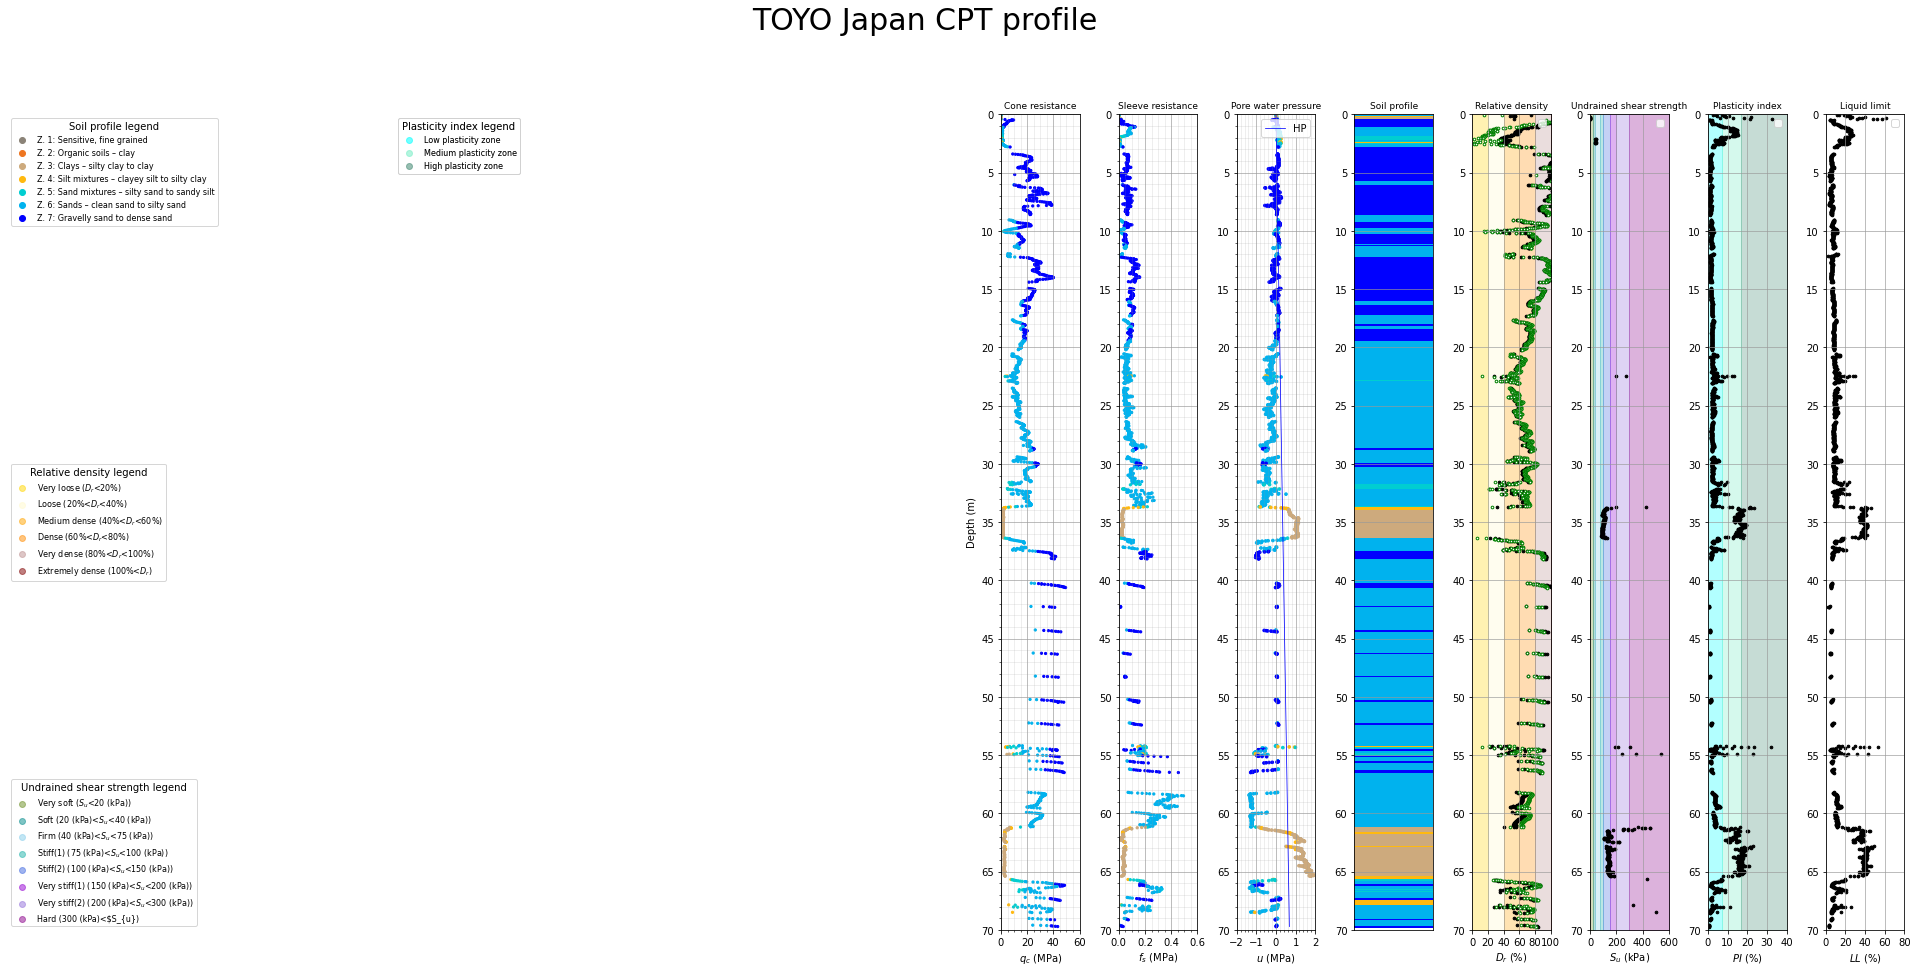

In [27]:
outer_plot_count = 0; kkk = 0;
Out_num_row = 1; Out_num_col = 2 #len(CPT_ID2);
In_num_row  = 1; In_num_col  = 8;

fig = plt.figure(figsize = ((17*Out_num_col), (15*Out_num_row)))
fig.patch.set_facecolor('white')
fig.suptitle('TOYO Japan CPT profile', fontsize= 30)
fig.tight_layout()
outer = gridspec.GridSpec(Out_num_row, Out_num_col, wspace = 0.1, hspace = 0.35)

###############################################################################################################
leg_fsize = '8'; alpha_color = 0.5

COLOR_Su = ['olivedrab', 'darkcyan', 'skyblue', 'lightseagreen', 'royalblue', 'darkviolet', 'mediumpurple', 'darkmagenta']
    
Leg_Su   = ['Very soft ($S_{u}$<20 (kPa))', 'Soft (20 (kPa)<$S_{u}$<40 (kPa))', 'Firm (40 (kPa)<$S_{u}$<75 (kPa))', 'Stiff(1) (75 (kPa)<$S_{u}$<100 (kPa))', 'Stiff(2) (100 (kPa)<$S_{u}$<150 (kPa))', 'Very stiff(1) (150 (kPa)<$S_{u}$<200 (kPa))', 'Very stiff(2) (200 (kPa)<$S_{u}$<300 (kPa))', 'Hard (300 (kPa)<$S_{u})']

COLOR_Dr = ['gold', 'lemonchiffon', 'orange', 'darkorange', 'rosybrown', 'maroon']
Leg_Dr   = ['Very loose ($D_{r}$<20%)', 'Loose (20%<$D_{r}$<40%)', 'Medium dense (40%<$D_{r}$<60%)', 'Dense (60%<$D_{r}$<80%)', 'Very dense (80%<$D_{r}$<100%)', 'Extremely dense (100%<$D_{r}$)']

COLOR_PI = ['#00FFFF', '#76EEC6', '#458B74']
Leg_PI   = ['Low plasticity zone', 'Medium plasticity zone', 'High plasticity zone']


# plot: adding Legends as the first subplot of the outer plot
inner = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[0], wspace=0.3, hspace=0.25)
ax1_in = plt.Subplot(fig, inner[0])
ax1 = fig.add_subplot(ax1_in)
    
lines1 = len(COLOR_Bq) * ['']; lines2 = len(COLOR_Dr) * ['']; lines3 = len(COLOR_Su) * ['']; lines4 = len(COLOR_PI) * [''];

for j in range(len(COLOR_Bq)):
    lines1[j] = ax1.scatter([], [], facecolor = COLOR_Bq[j], edgecolor = COLOR_Bq[j], label = SBT_Bq[j]);

#ax.axis('equal')

for j in range(len(COLOR_Dr)):
    lines2[j] = ax1.scatter([], [], facecolor = COLOR_Dr[j], edgecolor = COLOR_Dr[j], alpha=alpha_color);
    
for j in range(len(COLOR_Su)):
    lines3[j] = ax1.scatter([], [], facecolor = COLOR_Su[j], edgecolor = COLOR_Su[j], alpha=alpha_color);
    
for j in range(len(COLOR_PI)):
    lines4[j] = ax1.scatter([], [], facecolor = COLOR_PI[j], edgecolor = COLOR_PI[j], alpha=alpha_color);

leg1 = ax1.legend(               loc = 'upper left'  , title = "Soil profile legend"            , fontsize = leg_fsize);
leg2 = ax1.legend(lines2,Leg_Dr, loc = 'center left' , title = "Relative density legend"        , fontsize = leg_fsize);
leg3 = ax1.legend(lines3,Leg_Su, loc = 'lower left'  , title = "Undrained shear strength legend", fontsize = leg_fsize);
leg4 = ax1.legend(lines4,Leg_PI, loc = 'upper center', title = "Plasticity index legend"        , fontsize = leg_fsize);

ax1.add_artist(leg1);
ax1.add_artist(leg2);
ax1.add_artist(leg3);
ax1.add_artist(leg4);
ax1.axis('off')   ;
###############################################################################################################

outer_plot_count += 1
###############################################################################################################

# reading data

# Restarting all the vectors
Dpth_1 = []; qc_1 = []; fs_1 = []; u2_1 = []; qt = []; Rf = []; 
COEF_gamma_R = []; COEF_gamma_M = []; gamma = []; sigmaV0 = []; u0 = []; sigmaEV0 = []; 
Du = []; qn = []; Bq = []; Fr = []; n = []; CN = []; Qtn = []; Ic = [];
Data_tot = []; Data_su = []; Data_Dr = [];
Dpth_Dr = []; Dr_B1 = []; Dr_M1 = []; Dr_KM1 = []; Dr_J1 = []; Dr_avg1 = []; Dpth_Su = []; Su = []; Colr_Su = [];
plas_typ = []; 

###############################################################################################################
###############################################################################################################
# reading data
CPT_local_filter = CPT_data[~CPT_data['fs (Mpa)'].isnull()]

Dpth = CPT_local_filter['Depth (m)'].reset_index(drop=True)
qc   = CPT_local_filter['qc (Mpa)' ].reset_index(drop=True)
fs   = CPT_local_filter['fs (Mpa)' ].reset_index(drop=True)
u2   = CPT_local_filter['U (Mpa)'  ].reset_index(drop=True)

###############################################################################################################
###############################################################################################################
# Calculating the variables required for analysis
qt = qc  + u2 * (1 - a)                                                            # Cone resistance corrected for pore water pressures
Rf = fs / qt * 100                                                                 # Friction ratio (%)
COEF_gamma_R = 0.27 * np.log10(Rf) + 0.36 * np.log10(qt / pa) + 1.236              # Robertson (2009)
COEF_gamma_M = 1.22 + 0.15 * np.log10(100 * (fs / pa) + 0.01)                      # Mayne (2014): suitable for sandy material
gamma = gammaW * COEF_gamma_M                                                      # Soil total unit wiegh (same unit to gammaW)
sigmaV0 = vertical_stress(gamma, Dpth)[0] / (10**6)                                # Total vertical overburden stress (MPa)
u0 = Dpth * gammaW / (10**6)                                                       # Hydrostatic pressure (MPa) 
sigmaEV0 = sigmaV0 - u0                                                            # Effective vertical overburden stress (MPa)
Du = u2 - u0                                                                       # Excess pore pressure (MPa)
qn = qt - sigmaV0                                                                  # qn (MPa)
Bq = Du / qn                                                                       # Normalised pore pressure parameter
Fr = fs / (qt - sigmaV0) * 100                                                     # Normalized friction ratio (%)

n   = n_power(sigmaV0, sigmaEV0, Fr, qt)[0];                                        # Stress exponent
      
CN  = (pa / sigmaEV0)**n                                                
Qtn = ((qt - sigmaV0) / pa) * CN                                                   # Non-dimensional cone resistance and taking account of the in-situ vertical stresses
Ic  = np.sqrt( ( (3.47 - np.log10(Qtn))**2 + (np.log10(Fr) + 1.22)**2 ) )          # Soil type index

# Plasticity index and liquid limit
PI_Fugro = PI_CPT(qt, Fr, Rf, Bq, Qtn, sigmaV0, sigmaEV0)[0] 
PI_Celin = PI_CPT(qt, Fr, Rf, Bq, Qtn, sigmaV0, sigmaEV0)[1]
LL_Celin = PI_CPT(qt, Fr, Rf, Bq, Qtn, sigmaV0, sigmaEV0)[2]

# Selecting the Plasticity index for determining the plasticity properties of the soil
PI_f = PI_Fugro

###############################################################################################################
###############################################################################################################
# Forming the data
CPT_data_11_Bq = str(list(zip(Bq, Qtn))).replace(',', ''); CPT_data_21_Bq = CPT_data_11_Bq.replace('(', 'POINT ('); 
CPT_data_31_Bq = CPT_data_21_Bq.replace(')', '),');   CPT_data_41_Bq = list(CPT_data_31_Bq[1:-2].split(","))

CPT_data_11_Fr = str(list(zip(Fr, Qtn))).replace(',', ''); CPT_data_21_Fr = CPT_data_11_Fr.replace('(', 'POINT ('); 
CPT_data_31_Fr = CPT_data_21_Fr.replace(')', '),');   CPT_data_41_Fr = list(CPT_data_31_Fr[1:-2].split(","))

color_Bq = []; soil_typ_Bq = []; Consolidation_Bq = []; Categ_Bq = [];
color_Fr = []; soil_typ_Fr = []; Consolidation_Fr = []; Categ_Fr = [];
for x in CPT_data_41_Bq:
    color_Bq.append(Properties_Bq(str(x))[0])
    soil_typ_Bq.append(Properties_Bq(str(x))[1])
    Consolidation_Bq.append(Properties_Bq(str(x))[2])
    Categ_Bq.append(Properties_Bq(str(x))[3])

    kk =+ 1

for x in CPT_data_41_Fr:
    color_Fr.append(Properties_Fr(str(x))[0])
    soil_typ_Fr.append(Properties_Fr(str(x))[1])
    Consolidation_Fr.append(Properties_Fr(str(x))[2])
    Categ_Fr.append(Properties_Fr(str(x))[3])

    kk =+ 1

Consolidation1 = Consolidation_Bq; Categ1 = Categ_Bq; soil_typ1 = soil_typ_Bq; color_f = color_Bq;
    
Dpth_Dr = []; Dr_B = []; Dr_M = []; Dr_KM = []; Dr_J = []; SU = []; Dpth_SU = [];    
for i in range(len(Dpth)):
    if soil_typ1[i] == 'Sand':
        df_Dr = Relative_density_new(i, qc, qt, Qtn, sigmaEV0, Dpth, soil_typ1)
        Dr_B2    = df_Dr[0] 
        Dr_M2    = df_Dr[1]
        Dr_KM2   = df_Dr[2] 
        Dr_J2    = df_Dr[3]
        Dr_avg2  = df_Dr[4]
        Dpth_Dr2 = df_Dr[5]
        
        Dpth_Dr.append(Dpth_Dr2); Dr_B.append(Dr_B2); Dr_M.append(Dr_M2); Dr_KM.append(Dr_KM2); Dr_J.append(Dr_J2)
        
    if soil_typ1[i] == 'Clay':
        df_Su = Undrained_shear_strength_new(i, qt, sigmaV0, sigmaEV0, Dpth, soil_typ1, Categ1, color_f)
        SU1       = df_Su[0]
        DPTH_SU1  = df_Su[1]
        
        SU.append(SU1); Dpth_SU.append(DPTH_SU1)

###############################################################################################################
###############################################################################################################
# Soil dynamic damping calculations           
Dyn_Damp = Dynamic_damping_coef(Dpth, Dpth_SU, soil_typ1, SU)[0]    
Avg_Damp = sum(Dyn_Damp) / len(Dyn_Damp)

###############################################################################################################
###############################################################################################################
# Clustering: collecting the indeces for layers

color_f = color_Bq;
list_idx = [0]
for i in range(len(Categ_Bq) - 1):
    if Categ_Bq[i+1] != Categ_Bq[i]:
        list_idx.append(i)

list_idx.append(i+1)

###############################################################################################################
###############################################################################################################
# Clustering: colleting data layers

Depth_thick = Dpth[list_idx].reset_index(drop=True); 
Thickness = []; Col_thick = []; Type_thick = []; Type_general_thick = []
for i in range(1, len(list_idx)):
    Thickness         .append(Dpth[list_idx[i]] - Dpth[list_idx[i - 1]])
    Type_thick        .append(Categ_Bq[list_idx[i] ])
    Type_general_thick.append(soil_typ_Bq[list_idx[i] ])
    Col_thick         .append(color_Bq[list_idx[i] ])


df = pd.DataFrame({'Thickness': Thickness, 'Soil type': Type_thick, 'Soil type General': Type_general_thick, 'Soil color': Col_thick})

###############################################################################################################
###############################################################################################################







###############################################################################################################
###############################################################################################################
# Plotting:

color_f = color_Bq;

inner = gridspec.GridSpecFromSubplotSpec(In_num_row, In_num_col,
                    subplot_spec=outer[outer_plot_count], wspace=0.5, hspace=0.05)


Depth_cap = 70

###############################################################################################################
# plotting qc vs. depth
SIZE = 5
ax0_in = plt.Subplot(fig, inner[kkk])
ax0 = fig.add_subplot(ax0_in)

plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.ylim(0, Depth_cap)
plt.xlim(0, 60);
plt.xticks(np.arange(0, 61, 20))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
plt.gca().invert_yaxis()
plt.scatter(qc,  Dpth, facecolor = color_f, edgecolor = color_f, s = SIZE)
plt.xlabel('$q_{c}$ (MPa)')
plt.ylabel('Depth (m)')
plt.title('Cone resistance' ,fontsize=9)

kkk += 1
###############################################################################################################
# plotting fs vs. depth
SIZE = 5
ax1_in = plt.Subplot(fig, inner[kkk])
ax1 = fig.add_subplot(ax1_in)

plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.ylim(0, Depth_cap)
plt.xlim(0, 0.6);
plt.xticks(np.arange(0, 0.61, 0.2))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
plt.gca().invert_yaxis()
plt.scatter(fs,  Dpth, facecolor = color_f, edgecolor = color_f, s = SIZE)
plt.xlabel('$f_{s}$ (MPa)')
plt.title('Sleeve resistance' ,fontsize=9)

kkk += 1
###############################################################################################################
# plotting u2 vs. depth
SIZE = 7
ax2_in = plt.Subplot(fig, inner[kkk])
ax2 = fig.add_subplot(ax2_in)

plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.ylim(0, Depth_cap)
plt.xlim(-2, 2);
plt.xticks(np.arange(-2, 2.1, 1))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
plt.gca().invert_yaxis()
plt.scatter(u2,  Dpth, facecolor = color_f, edgecolor = color_f, s = SIZE)
plt.plot(u0,  Dpth, 'blue', linewidth=0.75, label='HP')
plt.xlabel('$u$ (MPa)')
plt.title('Pore water pressure' ,fontsize=9)
plt.legend(loc='upper right', shadow=False)

kkk += 1

###############################################################################################################
# Soil layers and profile: looping through all CPTs
table_font = 5

ax3_in = plt.Subplot(fig, inner[kkk])

ax3 = fig.add_subplot(ax3_in)

plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)

plt.xlim(-0.1, 0.1)
ax3.axes.get_xaxis().set_ticks([])
#plt.yticks(np.arange(0, max(Dpth), 0.5))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
#plt.ylabel('Depth (m)');
#plt.ylim(0, (max(Dpth)+0.1))
plt.ylim(0, Depth_cap)
plt.gca().invert_yaxis()

for i in range(0, (len(list_idx)-1)):
    ax3.axhspan(Depth_thick[i], Depth_thick[i+1], alpha=1, color=df['Soil color'][i])

plt.title('Soil profile' ,fontsize=9)

kkk += 1

###############################################################################################################
# Relative density profile

SIZE = 7;
#ax3 = fig.add_subplot(gs[0, 2:-2])
ax4_in = plt.Subplot(fig, inner[kkk])
ax4 = fig.add_subplot(ax4_in)
plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)
#plt.minorticks_on()
#plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

alpha_color = 0.3
Lim0 = 0; Lim1 = 20; Lim2 = 40; Lim3 = 60; Lim4 = 80; Lim5 = 100; Lim6 = 150;
x1 = np.linspace(Lim0, Lim1, 2); x2 = np.linspace(Lim1, Lim2, 2)
x3 = np.linspace(Lim2, Lim3, 2); x4 = np.linspace(Lim3, Lim4, 2)
x5 = np.linspace(Lim4, Lim5, 2); x6 = np.linspace(Lim5, Lim6, 2)

plt.fill_between(x1, 0, 1, color='gold'        , alpha=alpha_color, transform=ax4.get_xaxis_transform())
plt.fill_between(x2, 0, 1, color='lemonchiffon', alpha=alpha_color, transform=ax4.get_xaxis_transform())
plt.fill_between(x3, 0, 1, color='orange'      , alpha=alpha_color, transform=ax4.get_xaxis_transform())
plt.fill_between(x4, 0, 1, color='darkorange'  , alpha=alpha_color, transform=ax4.get_xaxis_transform())
plt.fill_between(x5, 0, 1, color='rosybrown'   , alpha=alpha_color, transform=ax4.get_xaxis_transform())
plt.fill_between(x6, 0, 1, color='maroon'      , alpha=alpha_color, transform=ax4.get_xaxis_transform())


plt.scatter(Dr_KM , Dpth_Dr, facecolor = 'k', edgecolor = 'k'   , s = SIZE)
plt.scatter(Dr_J  , Dpth_Dr, facecolor = 'white', edgecolor = 'g'   , s = SIZE)
#plt.legend(['Average'], fontsize = 2)

#plt.ylim(0, (max(Dpth)+0.1)); 

#plt.yticks(np.arange(0, max(Dpth), 0.5))
#plt.yticks(np.arange(0, max(Dpth), 1))
plt.ylim(0, Depth_cap)
plt.xlim(0, 100);
plt.xticks(np.arange(0, 105, 20))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
plt.gca().invert_yaxis(); 

plt.legend(fontsize=6)

plt.xlabel('$D_{r}$ (%)')
plt.title('Relative density' ,fontsize=9)
plt.legend(loc = 'upper right', shadow=False)

kkk += 1

###############################################################################################################
# Undrained shear strength profile
SIZE = 7;
ax5_in = plt.Subplot(fig, inner[kkk])
ax5 = fig.add_subplot(ax5_in)
plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)
#plt.minorticks_on()
#plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
if SU == []:
    aaa = 1
else:
    aaa = max(SU)*1.1

alpha_color = 0.3
Lim0 = 0; Lim1 = 20; Lim2 = 40; Lim3 = 75; Lim4 = 100; Lim5 = 150; Lim6 = 200; Lim7 = 300; Lim8 = 600;
x1 = np.linspace(Lim0, Lim1, 2); x2 = np.linspace(Lim1, Lim2, 2)
x3 = np.linspace(Lim2, Lim3, 2); x4 = np.linspace(Lim3, Lim4, 2)
x5 = np.linspace(Lim4, Lim5, 2); x6 = np.linspace(Lim5, Lim6, 2)
x7 = np.linspace(Lim6, Lim7, 2); x8 = np.linspace(Lim7, Lim8, 2)

plt.fill_between(x1, 0, 1, color='olivedrab'    , alpha=alpha_color, transform=ax5.get_xaxis_transform())
plt.fill_between(x2, 0, 1, color='darkcyan'     , alpha=alpha_color, transform=ax5.get_xaxis_transform())
plt.fill_between(x3, 0, 1, color='skyblue'      , alpha=alpha_color, transform=ax5.get_xaxis_transform())
plt.fill_between(x4, 0, 1, color='lightseagreen', alpha=alpha_color, transform=ax5.get_xaxis_transform())
plt.fill_between(x5, 0, 1, color='royalblue'    , alpha=alpha_color, transform=ax5.get_xaxis_transform())
plt.fill_between(x6, 0, 1, color='darkviolet'   , alpha=alpha_color, transform=ax5.get_xaxis_transform())
plt.fill_between(x7, 0, 1, color='mediumpurple' , alpha=alpha_color, transform=ax5.get_xaxis_transform())
plt.fill_between(x8, 0, 1, color='darkmagenta'  , alpha=alpha_color, transform=ax5.get_xaxis_transform())

#plt.ylim(0, (max(Dpth)+0.1)); 
#plt.xlim(0, min( aaa, 50));

#plt.xticks(np.arange(0, 26, 5))
plt.xlim(0, 600);
plt.xticks(np.arange(0, 601, 200))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
plt.ylim(0, Depth_cap)
plt.gca().invert_yaxis(); 
plt.scatter(SU,  Dpth_SU, facecolor = 'k', edgecolor = "k", s = SIZE)
plt.xlabel('$S_{u}$ (kPa)'); 
plt.title('Undrained shear strength' ,fontsize=9)
plt.legend(loc='upper right', shadow=False)

kkk += 1

###############################################################################################################
# Plasticity index plotting: 'PI (Cetin & Ozan (2009))'
SIZE = 7;
ax6_in = plt.Subplot(fig, inner[kkk])
ax6 = fig.add_subplot(ax6_in)
plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)

Lim0 = 0; Lim1 = 7; Lim2 = 17; Lim3 = max(max(PI_Fugro), max(PI_Celin)) + 10
x1 = np.linspace(Lim0, Lim1, 2); x2 = np.linspace(Lim1, Lim2, 2); x3 = np.linspace(Lim2, Lim3, 2); 

plt.fill_between(x1, 0, 1, color='#00FFFF', alpha=alpha_color, transform=ax6.get_xaxis_transform())
plt.fill_between(x2, 0, 1, color='#76EEC6', alpha=alpha_color, transform=ax6.get_xaxis_transform())
plt.fill_between(x3, 0, 1, color='#458B74', alpha=alpha_color, transform=ax6.get_xaxis_transform())

plt.xlim(0, 40);
plt.xticks(np.arange(0, 41, 10))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
plt.ylim(0, Depth_cap)
plt.gca().invert_yaxis(); 

plt.scatter(PI_Celin,  Dpth, facecolor = 'k', edgecolor = 'k', s = SIZE)

plt.xlabel('$PI$ (%)')
plt.title('Plasticity index' ,fontsize=9)
plt.legend(loc='upper right', shadow=False)

kkk += 1

###############################################################################################################  
# Liquid index plotting: 'PI (Cetin & Ozan (2009))'
SIZE = 7;
ax7_in = plt.Subplot(fig, inner[kkk])
ax7 = fig.add_subplot(ax7_in)
plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)


plt.xlim(0, 80);
plt.xticks(np.arange(0, 81, 20))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
plt.ylim(0, Depth_cap)
plt.gca().invert_yaxis(); 

plt.scatter(LL_Celin,  Dpth, facecolor = 'k', edgecolor = 'k', s = SIZE)

plt.xlabel('$LL$ (%)')
plt.title('Liquid limit'  ,fontsize=9)
plt.legend(loc='upper right', shadow=False)


###############################################################################################################

#Path_save = PATH_L + 'profile/'
#plt.savefig(Path_save + 'CPT_profile_TOYO_15m.svg')

fig.show()



# Select the method of calculating the gaps: averaging method or previous value filling?

In [28]:
# CPT_analysis_method = 'Averaging method'
# CPT_analysis_method = 'Filling method' 
CPT_analysis_method = 'Manual' 

# CPT averanging

## Block averaging parameters

In [29]:
# b: averanging block range for qc in meter
b = 0.05;

# interval of interest for each block
interval_depth = 0.05

# Cap/maximum value
CAP_exist = "Yes"
qc_cap = 60

# Filling values with previous value method

## Block averaging parameters

In [30]:
Tol_interval        = 0.03
interval_depth_fill = 0.02

# Filling values manually

In [31]:
interval_depth_fill_manual = 0.02

# Algorithms of analysing CPT

In [32]:
if CPT_analysis_method == 'Averaging method':
    
    ###############################################################################################################
    ###############################################################################################################
    ###############################################################################################################
    ###############################################################################################################

    qc_cum = []; fs_cum = []; 
    ###############################################################################################################
    ###############################################################################################################
    # Cummulative fs and qc
    fs1  = np.nan_to_num(fs, nan = 0)
    qc1  = np.nan_to_num(qc, nan = 0)

    for i in range(len(Dpth)):
    ###############################################################################################################
    # Local calculation of the depth, qc, qt, fs, effective vertical stress andsoil type (sand or clay) for the soil column above the tip of the pile at each depth
        qc_cum.append(sum(qc1[ : (i + 1)]))
        fs_cum.append(sum(fs1[ : (i + 1)]))

    ###############################################################################################################
    ###############################################################################################################
    ###############################################################################################################
    # averaging qc or qt for blocks 
    # averaging qc or qt for blocks 

    Dpth_b = Dpth
    qc_b   = qc
    fs_b   = fs
    u2_b   = u2

    itnum = int(math.modf(max(Dpth_b)/b)[1] + 1) ;

    ###############################################################################################################
    Dpth_final = []; qc_final = []; fs_final = []; u2_final = []

    qc_avg_block, fs_avg_block, u2_avg_block = qc_b[0], fs_b[0], u2_b[0]

    for i in range(itnum):
        # Detremining the average block values
        criteria  = ((i * b) <= Dpth_b) & (Dpth_b <= ((i + 1) * b))

        if len(np.where(criteria == True)[0]) == 0:
            qc_avg_block = qc_avg_block
            fs_avg_block = fs_avg_block
            u2_avg_block = u2_avg_block

        else:
            qc_avg_block   = sum(qc_b[criteria]) / len(qc_b[criteria])
            fs_avg_block   = sum(fs_b[criteria]) / len(fs_b[criteria])
            u2_avg_block   = sum(u2_b[criteria]) / len(u2_b[criteria])


        # converting the results of the average block to identical intervals
        Dpth_kk1   = np.zeros((int(b/interval_depth),), dtype=float)
        Dpth_kk    = np.zeros((int(b/interval_depth),), dtype=float)
        plus_depth = np.zeros((int(b/interval_depth),), dtype=float)

        qc_kk = np.zeros((int(b/interval_depth),), dtype=float)
        fs_kk = np.zeros((int(b/interval_depth),), dtype=float)
        u2_kk = np.zeros((int(b/interval_depth),), dtype=float)

        # assigning the average qc and fs for each interval
        qc_kk[0:int(b/interval_depth)] = qc_avg_block
        fs_kk[0:int(b/interval_depth)] = fs_avg_block
        u2_kk[0:int(b/interval_depth)] = u2_avg_block

        # assigning depth for each interval
        Dpth_kk1[0:int(b/interval_depth)] = i * b 

        for k in range(int(b/interval_depth)):
            plus_depth[k] = k*interval_depth

        # adding all the depth, qc and fs of interval values for each block
        Dpth_final.extend(plus_depth + Dpth_kk1)
        qc_final.extend(qc_kk)
        fs_final.extend(fs_kk)
        u2_final.extend(u2_kk)

    data1    = {'Depth_exc': Dpth_final, 'qc_exc':qc_final, 'fs_exc':fs_final, 'u2_exc':u2_final}
    df_data1 = pd.DataFrame(data1, columns = ['Depth_exc', 'qc_exc', 'fs_exc', 'u2_exc'])
    
    ###############################################################################################################
    ###############################################################################################################
    ###############################################################################################################
    ###############################################################################################################
    
elif CPT_analysis_method == 'Filling method':
    qc_fill   = []; qc_fill.append(qc[0])
    fs_fill   = []; fs_fill.append(fs[0])
    u2_fill   = []; u2_fill.append(u2[0])
    Dpth_fill = []; Dpth_fill.append(Dpth[0])

    for i in range(1, len(Dpth)):
        delta_Dpth = Dpth[i] - Dpth[i-1]

        if delta_Dpth < Tol_interval:
            qc_fill.append(qc[i])
            fs_fill.append(fs[i])
            u2_fill.append(u2[i])
            Dpth_fill.append(Dpth[i])

        elif delta_Dpth >= Tol_interval:
            qc_take   = qc[i-1]
            fs_take   = fs[i-1]
            u2_take   = u2[i-1]
            Dpth_take = Dpth[i-1]

            num_interval = int(math.modf(delta_Dpth/interval_depth_fill)[1] + 1)

            for i in range(num_interval):
                qc_fill.append(qc_take)
                fs_fill.append(fs_take)
                u2_fill.append(u2_take)
                Dpth_fill.append(Dpth_take + i*interval_depth_fill)
                
    data1    = {'Depth_exc': Dpth_fill, 'qc_exc':qc_fill, 'fs_exc':fs_fill, 'u2_exc':u2_fill}
    df_data1 = pd.DataFrame(data1, columns = ['Depth_exc', 'qc_exc', 'fs_exc', 'u2_exc'])
                
    ###############################################################################################################
    ###############################################################################################################
    ###############################################################################################################
    ###############################################################################################################

elif CPT_analysis_method == 'Manual':
    qc_fill   = []; qc_fill.append(qc[0])
    fs_fill   = []; fs_fill.append(fs[0])
    u2_fill   = []; u2_fill.append(u2[0])
    Dpth_fill = []; Dpth_fill.append(Dpth[0])

    for i in range(1, len(Dpth)):
        delta_Dpth = Dpth[i] - Dpth[i-1]
        
        if Dpth[i] < 36.4:
            if delta_Dpth < Tol_interval:
                qc_fill.append(qc[i])
                fs_fill.append(fs[i])
                u2_fill.append(u2[i])
                Dpth_fill.append(Dpth[i])

            elif delta_Dpth >= Tol_interval:
                qc_take   = qc[i-1]
                fs_take   = fs[i-1]
                u2_take   = u2[i-1]
                Dpth_take = Dpth[i-1]

                num_interval = int(math.modf(delta_Dpth/interval_depth_fill)[1] + 1)

                for i in range(num_interval):
                    qc_fill.append(qc_take)
                    fs_fill.append(fs_take)
                    u2_fill.append(u2_take)
                    Dpth_fill.append(Dpth_take + i*interval_depth_fill)
                
    
    qc_take   = 50
    fs_take   = 0.2
    u2_take   = u2_fill[-1]
    Dpth_take = Dpth_fill[-1]

    num_interval_1 = int(math.modf((max(Dpth) - Dpth_take)/interval_depth_fill_manual)[1] + 1)

    for i in range(num_interval_1):
            qc_fill.append(qc_take)
            fs_fill.append(fs_take)
            u2_fill.append((Dpth_take + i*interval_depth_fill) * gammaW / (10**6))
            Dpth_fill.append(Dpth_take + i*interval_depth_fill)
    
    
    data1    = {'Depth_exc': Dpth_fill, 'qc_exc':qc_fill, 'fs_exc':fs_fill, 'u2_exc':u2_fill}
    df_data1 = pd.DataFrame(data1, columns = ['Depth_exc', 'qc_exc', 'fs_exc', 'u2_exc'])

## Replacing qc and qt with the corresponding values based on the selected method of CPT; 
## Averaging method or filling values based on previous values

In [33]:
qc_new   = df_data1['qc_exc'];
fs_new   = df_data1['fs_exc']
Dpth_new = df_data1['Depth_exc']
u2_new   = df_data1['u2_exc']

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\algo\AppData\Local\Temp/ipykernel_18644/1022405432.py:285: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


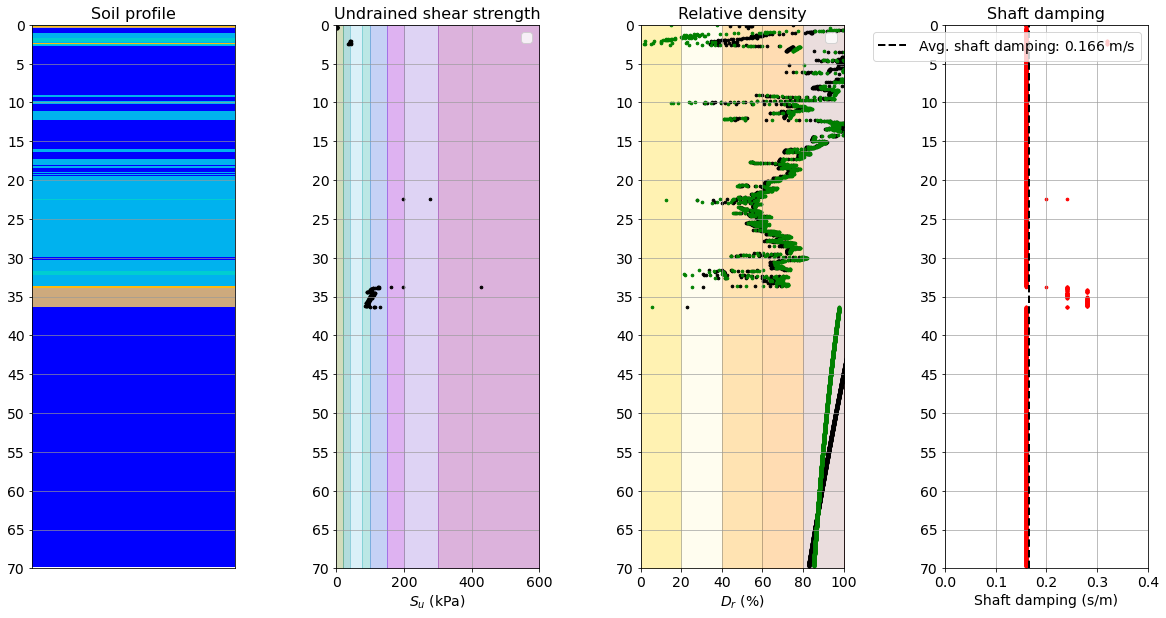

In [34]:
###############################################################################################################
###############################################################################################################
plas_typ1_new = []; 


# Calculating the variables required for analysis based on the average block values
qt_new = qc_new + u2_new * (1 - a)                                                             # Cone resistance corrected for pore water pressures
Rf_new = fs_new / qt_new * 100                                                                 # Friction ratio (%)
COEF_gamma_R_new = 0.27 * np.log10(Rf_new) + 0.36 * np.log10(qt_new / pa) + 1.236              # Robertson (2009)
COEF_gamma_M_new = 1.22 + 0.15 * np.log10(100 * (fs_new / pa) + 0.01)                          # Mayne (2014): suitable for sandy material
gamma_new = gammaW * COEF_gamma_M_new                                                          # Soil total unit wiegh (same unit to gammaW)
sigmaV0_new = vertical_stress(gamma_new, Dpth_new)[0] / (10**6)                                # Total vertical overburden stress (MPa)
u0_new = Dpth_new * gammaW / (10**6)                                                           # Hydrostatic pressure (MPa) 
sigmaEV0_new = sigmaV0_new - u0_new                                                            # Effective vertical overburden stress (MPa)
Du_new = u2_new - u0_new                                                                       # Excess pore pressure (MPa)
qn_new = qt_new - sigmaV0_new                                                                  # qn (MPa)
Bq_new = Du_new / qn_new                                                                       # Normalised pore pressure parameter
Fr_new = fs_new / (qt_new - sigmaV0_new) * 100                                                 # Normalized friction ratio (%)

n_new   = n_power(sigmaV0_new, sigmaEV0_new, Fr_new, qt_new)[0];                               # Stress exponent
CN_new  = (pa / sigmaEV0_new)**n_new                                                
Qtn_new = ((qt_new - sigmaV0_new) / pa) * CN_new                                               # Non-dimensional cone resistance and taking account of the in-situ vertical stresses
Ic_new  = np.sqrt( ( (3.47 - np.log10(Qtn_new))**2 + (np.log10(Fr_new) + 1.22)**2 ) )          # Soil type index

# Plasticity index and liquid limit
PI_Fugro_new = PI_CPT(qt_new, Fr_new, Rf_new, Bq_new, Qtn_new, sigmaV0_new, sigmaEV0_new)[0]   
PI_Celin_new = PI_CPT(qt_new, Fr_new, Rf_new, Bq_new, Qtn_new, sigmaV0_new, sigmaEV0_new)[1]
LL_Celin_new = PI_CPT(qt_new, Fr_new, Rf_new, Bq_new, Qtn_new, sigmaV0_new, sigmaEV0_new)[2]

# Selecting the Plasticity index for determining the plasticity properties of the soil
PI_f = PI_Fugro_new.replace(np.nan, 0.0001)
for x in PI_f:
    plas_typ1_new.append(Pl_prop(x))
    
plas_typ_new = pd.Series(plas_typ1_new)

# Forming the data
CPT_data_11_Bq = str(list(zip(Bq_new, Qtn_new))).replace(',', ''); CPT_data_21_Bq = CPT_data_11_Bq.replace('(', 'POINT ('); 
CPT_data_31_Bq = CPT_data_21_Bq.replace(')', '),');   CPT_data_41_Bq = list(CPT_data_31_Bq[1:-2].split(","))

CPT_data_11_Fr = str(list(zip(Fr_new, Qtn_new))).replace(',', ''); CPT_data_21_Fr = CPT_data_11_Fr.replace('(', 'POINT ('); 
CPT_data_31_Fr = CPT_data_21_Fr.replace(')', '),');   CPT_data_41_Fr = list(CPT_data_31_Fr[1:-2].split(","))

color_Bq_new = []; soil_typ_Bq_new = []; Consolidation_Bq_new = []; Categ_Bq_new = [];
color_Fr_new = []; soil_typ_Fr_new = []; Consolidation_Fr_new = []; Categ_Fr_new = [];
for x in CPT_data_41_Bq:
    color_Bq_new.append(Properties_Bq(str(x))[0])
    soil_typ_Bq_new.append(Properties_Bq(str(x))[1])
    Consolidation_Bq_new.append(Properties_Bq(str(x))[2])
    Categ_Bq_new.append(Properties_Bq(str(x))[3])

for x in CPT_data_41_Fr:
    color_Fr_new.append(Properties_Fr(str(x))[0])
    soil_typ_Fr_new.append(Properties_Fr(str(x))[1])
    Consolidation_Fr_new.append(Properties_Fr(str(x))[2])
    Categ_Fr_new.append(Properties_Fr(str(x))[3])

Consolidation1_new = Consolidation_Bq_new; Categ1_new = Categ_Bq_new; soil_typ1_new = soil_typ_Bq_new; color_f_new = color_Bq_new;

###############################################################################################################
###############################################################################################################
# Relative density and Undrained shear strength
      
Dpth_Dr_new = []; Dr_J_new = []; Dr_B_new = []; Dr_KM_new = []; Dr_M_new = []; SU_new = []; Dpth_SU_new = [];    
for i in range(len(Dpth_new)):
    if soil_typ1_new[i] == 'Sand':
        df_Dr_new = Relative_density_new(i, qc_new, qt_new, Qtn_new, sigmaEV0_new, Dpth_new, soil_typ1_new)
        Dr_B2_new    = df_Dr_new[0] 
        Dr_M2_new    = df_Dr_new[1]
        Dr_KM2_new   = df_Dr_new[2] 
        Dr_J2_new    = df_Dr_new[3]
        #Dr_avg2_new  = df_Dr[4]
        Dpth_Dr2_new = df_Dr_new[5]
        
        Dpth_Dr_new.append(Dpth_Dr2_new); 
        Dr_B_new.append(Dr_B2_new); Dr_M_new.append(Dr_M2_new); Dr_KM_new.append(Dr_KM2_new); Dr_J_new.append(Dr_J2_new); 
        
    elif soil_typ1_new[i] == 'Clay':
        df_Su_new = Undrained_shear_strength_new(i, qt_new, sigmaV0_new, sigmaEV0_new, Dpth_new, soil_typ1_new, Categ1_new, color_f_new)
        SU1_new       = df_Su_new[0]
        DPTH_SU1_new  = df_Su_new[1]
        
        SU_new.append(SU1_new); Dpth_SU_new.append(DPTH_SU1_new)
        
###############################################################################################################
###############################################################################################################
    
Fric_angle1 = Friction_angle(Dpth_new, soil_typ1_new, qt_new, sigmaEV0_new, fs_new, pa)[0]
Fric_angle = pd.Series(Fric_angle1)

###############################################################################################################
###############################################################################################################

###############################################################################################################
###############################################################################################################
# Soil dynamic damping calculations           
Dyn_Damp = Dynamic_damping_coef(Dpth_new, Dpth_SU_new, soil_typ1_new, SU_new)[0]    
Avg_Damp = sum(Dyn_Damp) / len(Dyn_Damp)

###############################################################################################################
###############################################################################################################
# Clustering: collecting the indeces for layers

color_f_new = color_Bq_new;
list_idx_new = [0]
for i in range(len(Categ_Bq_new) - 1):
    if Categ_Bq_new[i+1] != Categ_Bq_new[i]:
        list_idx_new.append(i)

list_idx_new.append(i+1)

# Clustering: colleting data layers

Depth_thick_new = Dpth_new[list_idx_new].reset_index(drop=True); 
Thickness_new = []; Col_thick_new = []; Type_thick_new = []; Type_general_thick_new = []
for i in range(1, len(list_idx_new)):
    Thickness_new         .append(Dpth_new[list_idx_new[i]] - Dpth_new[list_idx_new[i - 1]])
    Type_thick_new        .append(Categ_Bq_new[list_idx_new[i] ])
    Type_general_thick_new.append(soil_typ_Bq_new[list_idx_new[i] ])
    Col_thick_new         .append(color_Bq_new[list_idx_new[i] ])


df_new = pd.DataFrame({'Thickness': Thickness_new, 'Soil type': Type_thick_new, 'Soil type General': Type_general_thick_new, 'Soil color': Col_thick_new})

###############################################################################################################
###############################################################################################################








###############################################################################################################
###############################################################################################################
# Plotting:
outer_plot_count = 0; kkk = 0;
Out_num_row = 1; Out_num_col = 1 
In_num_row  = 1; In_num_col  = 4;

fig = plt.figure(figsize = ((20*Out_num_col), (10*Out_num_row)))
fig.patch.set_facecolor('white')
#fig.suptitle('TOYO Japan CPT profile', fontsize= 30)
fig.tight_layout()
outer = gridspec.GridSpec(Out_num_row, Out_num_col, wspace = 0.1, hspace = 0.35)



color_f = color_Bq_new;
inner = gridspec.GridSpecFromSubplotSpec(In_num_row, In_num_col,
                    subplot_spec=outer[outer_plot_count], wspace=0.5, hspace=0.05)

Depth_cap = 70
lw = 2.5; SIZE = 7; FS = 16; 
plt.rcParams.update({'font.size': 14})
###############################################################################################################
############################################# Second block ####################################################
#outer_plot_count += 1; 

inner = gridspec.GridSpecFromSubplotSpec(In_num_row, In_num_col,
                    subplot_spec=outer[outer_plot_count], wspace=0.5, hspace=0.05)

###############################################################################################################
# Soil layers and profile: looping through all CPTs
ax0_in = plt.Subplot(fig, inner[0])
ax0 = fig.add_subplot(ax0_in)

plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)

plt.xlim(-0.1, 0.1)
ax0.axes.get_xaxis().set_ticks([])
#plt.yticks(np.arange(0, max(Dpth), 0.5))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
#plt.ylabel('Depth (m)');
#plt.ylim(0, (max(Dpth)+0.1))
plt.ylim(0, Depth_cap)
plt.gca().invert_yaxis()

for i in range(0, (len(list_idx_new)-1)):
    ax0.axhspan(Depth_thick_new[i], Depth_thick_new[i+1], alpha=1, color=df_new['Soil color'][i])

plt.title('Soil profile' ,fontsize=FS)

###############################################################################################################
# plotting undrained shear strength vs. depth
ax1_in = plt.Subplot(fig, inner[1])
ax1 = fig.add_subplot(ax1_in)

plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)
#plt.minorticks_on()
#plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
if SU == []:
    aaa = 1
else:
    aaa = max(SU)*1.1

alpha_color = 0.3
Lim0 = 0; Lim1 = 20; Lim2 = 40; Lim3 = 75; Lim4 = 100; Lim5 = 150; Lim6 = 200; Lim7 = 300; Lim8 = 600;
x1 = np.linspace(Lim0, Lim1, 2); x2 = np.linspace(Lim1, Lim2, 2)
x3 = np.linspace(Lim2, Lim3, 2); x4 = np.linspace(Lim3, Lim4, 2)
x5 = np.linspace(Lim4, Lim5, 2); x6 = np.linspace(Lim5, Lim6, 2)
x7 = np.linspace(Lim6, Lim7, 2); x8 = np.linspace(Lim7, Lim8, 2)

plt.fill_between(x1, 0, 1, color='olivedrab'    , alpha=alpha_color, transform=ax1.get_xaxis_transform())
plt.fill_between(x2, 0, 1, color='darkcyan'     , alpha=alpha_color, transform=ax1.get_xaxis_transform())
plt.fill_between(x3, 0, 1, color='skyblue'      , alpha=alpha_color, transform=ax1.get_xaxis_transform())
plt.fill_between(x4, 0, 1, color='lightseagreen', alpha=alpha_color, transform=ax1.get_xaxis_transform())
plt.fill_between(x5, 0, 1, color='royalblue'    , alpha=alpha_color, transform=ax1.get_xaxis_transform())
plt.fill_between(x6, 0, 1, color='darkviolet'   , alpha=alpha_color, transform=ax1.get_xaxis_transform())
plt.fill_between(x7, 0, 1, color='mediumpurple' , alpha=alpha_color, transform=ax1.get_xaxis_transform())
plt.fill_between(x8, 0, 1, color='darkmagenta'  , alpha=alpha_color, transform=ax1.get_xaxis_transform())

#plt.ylim(0, (max(Dpth)+0.1)); 
#plt.xlim(0, min( aaa, 50));

#plt.xticks(np.arange(0, 26, 5))
plt.xlim(0, 600);
plt.xticks(np.arange(0, 601, 200))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
plt.ylim(0, Depth_cap)
plt.gca().invert_yaxis(); 
plt.scatter(SU_new,  Dpth_SU_new, facecolor = 'k', edgecolor = "k", s = SIZE)
plt.xlabel('$S_{u}$ (kPa)'); 
plt.title('Undrained shear strength' ,fontsize=FS)
plt.legend(loc='upper right', shadow=False)

###############################################################################################################
# plotting Relative density vs. depth
ax2_in = plt.Subplot(fig, inner[2])
ax2 = fig.add_subplot(ax2_in)
plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)
#plt.minorticks_on()
#plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

alpha_color = 0.3
Lim0 = 0; Lim1 = 20; Lim2 = 40; Lim3 = 60; Lim4 = 80; Lim5 = 100; Lim6 = 150;
x1 = np.linspace(Lim0, Lim1, 2); x2 = np.linspace(Lim1, Lim2, 2)
x3 = np.linspace(Lim2, Lim3, 2); x4 = np.linspace(Lim3, Lim4, 2)
x5 = np.linspace(Lim4, Lim5, 2); x6 = np.linspace(Lim5, Lim6, 2)

plt.fill_between(x1, 0, 1, color='gold'        , alpha=alpha_color, transform=ax2.get_xaxis_transform())
plt.fill_between(x2, 0, 1, color='lemonchiffon', alpha=alpha_color, transform=ax2.get_xaxis_transform())
plt.fill_between(x3, 0, 1, color='orange'      , alpha=alpha_color, transform=ax2.get_xaxis_transform())
plt.fill_between(x4, 0, 1, color='darkorange'  , alpha=alpha_color, transform=ax2.get_xaxis_transform())
plt.fill_between(x5, 0, 1, color='rosybrown'   , alpha=alpha_color, transform=ax2.get_xaxis_transform())
plt.fill_between(x6, 0, 1, color='maroon'      , alpha=alpha_color, transform=ax2.get_xaxis_transform())

plt.scatter(Dr_KM_new, Dpth_Dr_new, facecolor = 'k', edgecolor = 'k'   , s = SIZE)
plt.scatter(Dr_J_new , Dpth_Dr_new, facecolor = 'g', edgecolor = 'g'   , s = SIZE)
   
plt.ylim(0, Depth_cap)
plt.xlim(0, 100);
plt.xticks(np.arange(0, 105, 20))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
plt.gca().invert_yaxis(); 

plt.legend(fontsize=FS)

plt.xlabel('$D_{r}$ (%)')
plt.title('Relative density' ,fontsize=FS)
plt.legend(loc = 'upper right', shadow=False)

###############################################################################################################
###############################################################################################################
ax3_in = plt.Subplot(fig, inner[3])
ax3 = fig.add_subplot(ax3_in)
plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)
#plt.minorticks_on()
#plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.ylim(0, Depth_cap)
plt.xlim(0, 0.40);
plt.xticks(np.arange(0, 0.41, 0.1))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
plt.gca().invert_yaxis()
plt.scatter(Dyn_Damp,  Dpth_new, facecolor = 'r', edgecolor = 'r', s = SIZE)
plt.axvline(x = Avg_Damp, color = 'k', linestyle = '--', linewidth = 2, label = 'Avg. shaft damping: ' + "$" + str(format(Avg_Damp,".3f")) + "$" + ' m/s')

plt.xlabel('Shaft damping (s/m)')
plt.title('Shaft damping' ,fontsize=FS)
plt.legend(loc='upper right', shadow=False)


fig.show()

#Path_save = 'C:/Ali/OFFSHORE PROJECRS/TOYO Japan/Driveability study/Figures/'
#plt.savefig(Path_save + 'CPT profile - result' + '.svg')


### Tabular output extracting

In [35]:
#df_output_result1 = pd.DataFrame({'Depth (m)': Dpth_new, 'qc (MPa)': qc_new, 'qt (MPa)': qt_new, 'fs (MPa)': fs_new, 'u (MPa)': u2_new, 'hydrostatic pressure (MPa)': u0_new, 'gamma total (kg/m2s2)': gamma_new, 'total vertical stress (MPa)': sigmaV0_new, 'effective vertical stress (MPa)': sigmaEV0_new, 'friction angle': Fric_angle})
#df_output_result2 = pd.DataFrame({'relative density J': Dr_J_new, 'KM': Dr_KM_new, 'B': Dr_B_new, 'M': Dr_M_new, 'relative density depth (m)': Dpth_Dr_new})
#df_output_result3 = pd.DataFrame({'undrained shear strength': SU_new, 'undrained shear strength depth (m)': Dpth_SU_new})

#Path_save = 'C:/Ali/OFFSHORE PROJECRS/TOYO Japan/Driveability study/Figures/'
#df_output_result1.to_excel(Path_save + 'data_CPT02.xlsx', sheet_name='sheet1')
#df_output_result2.to_excel(Path_save + 'data_Dr.xlsx', sheet_name='sheet1')
#df_output_result3.to_excel(Path_save + 'data_Su.xlsx', sheet_name='sheet1')

## All results in one figure

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\algo\AppData\Local\Temp/ipykernel_18644/1879151741.py:243: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


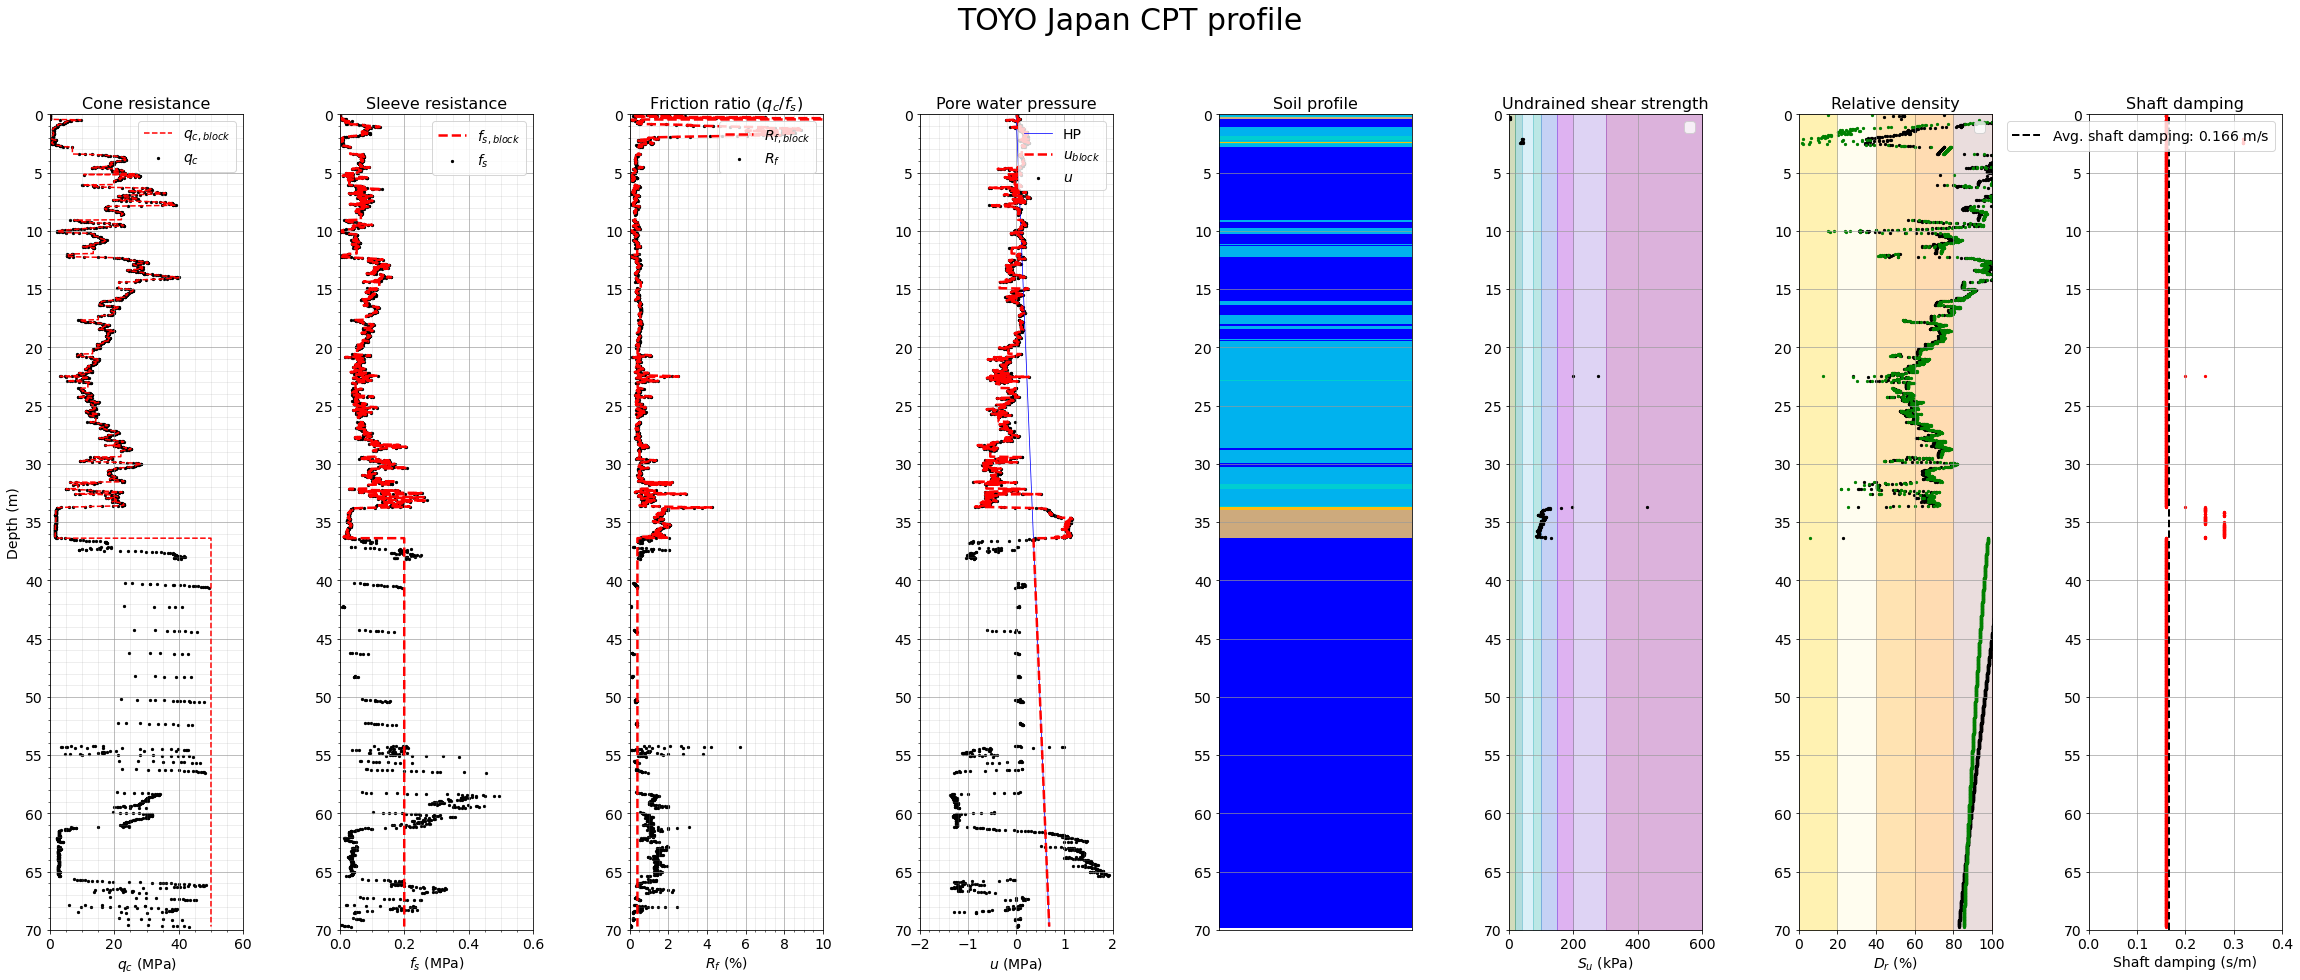

In [36]:
# Plotting:
outer_plot_count = 0; kkk = 0;
Out_num_row = 1; Out_num_col = 2 
In_num_row  = 1; In_num_col  = 4;

fig = plt.figure(figsize = ((20*Out_num_col), (15*Out_num_row)))
fig.patch.set_facecolor('white')
fig.suptitle('TOYO Japan CPT profile', fontsize= 30)
fig.tight_layout()
outer = gridspec.GridSpec(Out_num_row, Out_num_col, wspace = 0.1, hspace = 0.35)



color_f = color_Bq_new;
inner = gridspec.GridSpecFromSubplotSpec(In_num_row, In_num_col,
                    subplot_spec=outer[outer_plot_count], wspace=0.5, hspace=0.05)

Depth_cap = 70
lw = 2.5; SIZE = 5; FS = 16; 
plt.rcParams.update({'font.size': 14})
###############################################################################################################
############################################## First block ####################################################

###############################################################################################################
# plotting qt vs. depth

ax0_in = plt.Subplot(fig, inner[0])
ax0 = fig.add_subplot(ax0_in)

plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.ylim(0, Depth_cap)
plt.xlim(0, 60);
plt.xticks(np.arange(0, 61, 20))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
plt.gca().invert_yaxis()
plt.scatter(qc,  Dpth, facecolor = 'k', edgecolor = 'k', s = SIZE, label = '$q_{c}$')
plt.plot(qc_new,  Dpth_new, 'r', linestyle = '--', label = '$q_{c, block}$')
plt.xlabel('$q_{c}$ (MPa)')
plt.ylabel('Depth (m)')
plt.title('Cone resistance' ,fontsize=FS)
plt.legend(loc='upper right', shadow=False)

###############################################################################################################
# plotting fs vs. depth
ax1_in = plt.Subplot(fig, inner[1])
ax1 = fig.add_subplot(ax1_in)

plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.ylim(0, Depth_cap)
plt.xlim(0, 0.6);
plt.xticks(np.arange(0, 0.61, 0.2))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
plt.gca().invert_yaxis()
plt.scatter(fs,  Dpth, facecolor = 'k', edgecolor = 'k', s = SIZE, label = '$f_{s}$')
plt.plot(fs_new,  Dpth_new, 'r', linestyle = '--', linewidth = lw, label = '$f_{s, block}$')
plt.xlabel('$f_{s}$ (MPa)')
plt.title('Sleeve resistance', fontsize=FS)
plt.legend(loc='upper right', shadow=False)

###############################################################################################################
# plotting Rf(%) vs. depth
ax2_in = plt.Subplot(fig, inner[2])
ax2 = fig.add_subplot(ax2_in)

plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.ylim(0, Depth_cap)

plt.xticks(np.arange(0, 21, 2))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
plt.gca().invert_yaxis()
plt.scatter(((fs/qc)*100),  Dpth, facecolor = 'k', edgecolor = 'k', s = SIZE, label = '$R_{f}$')
plt.plot(((fs_new/qc_new)*100),  Dpth_new, 'r', linestyle = '--', linewidth = lw, label = '$R_{f, block}$')
plt.xlim(0, 10);
plt.xlabel('$R_{f}$ (%)')
plt.title('Friction ratio ($q_{c}$/$f_{s}$)' ,fontsize=FS)
plt.legend(loc='upper right', shadow=False)

###############################################################################################################
# plotting u2 vs. depth
ax3_in = plt.Subplot(fig, inner[3])
ax3 = fig.add_subplot(ax3_in)

plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.ylim(0, Depth_cap)
plt.xlim(-2, 2);
plt.xticks(np.arange(-2, 2.1, 1))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
plt.gca().invert_yaxis()
plt.scatter(u2,  Dpth, facecolor = 'k', edgecolor = 'k', s = SIZE, label = '$u$')
plt.plot(u0,  Dpth, 'blue', linewidth=0.75, label='HP')
plt.plot(u2_new,  Dpth_new, 'r', linestyle = '--', linewidth = lw, label = '$u_{block}$')
plt.xlabel('$u$ (MPa)')
plt.title('Pore water pressure' ,fontsize=FS)
plt.legend(loc='upper right', shadow=False)

kkk += 1

###############################################################################################################
############################################# Second block ####################################################
outer_plot_count += 1; 

inner = gridspec.GridSpecFromSubplotSpec(In_num_row, In_num_col,
                    subplot_spec=outer[outer_plot_count], wspace=0.5, hspace=0.05)

###############################################################################################################
# Soil layers and profile: looping through all CPTs
ax0_in = plt.Subplot(fig, inner[0])
ax0 = fig.add_subplot(ax0_in)

plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)

plt.xlim(-0.1, 0.1)
ax0.axes.get_xaxis().set_ticks([])
#plt.yticks(np.arange(0, max(Dpth), 0.5))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
#plt.ylabel('Depth (m)');
#plt.ylim(0, (max(Dpth)+0.1))
plt.ylim(0, Depth_cap)
plt.gca().invert_yaxis()

for i in range(0, (len(list_idx_new)-1)):
    ax0.axhspan(Depth_thick_new[i], Depth_thick_new[i+1], alpha=1, color=df_new['Soil color'][i])

plt.title('Soil profile' ,fontsize=FS)

###############################################################################################################
# plotting undrained shear strength vs. depth
ax1_in = plt.Subplot(fig, inner[1])
ax1 = fig.add_subplot(ax1_in)

plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)
#plt.minorticks_on()
#plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
if SU == []:
    aaa = 1
else:
    aaa = max(SU)*1.1

alpha_color = 0.3
Lim0 = 0; Lim1 = 20; Lim2 = 40; Lim3 = 75; Lim4 = 100; Lim5 = 150; Lim6 = 200; Lim7 = 300; Lim8 = 600;
x1 = np.linspace(Lim0, Lim1, 2); x2 = np.linspace(Lim1, Lim2, 2)
x3 = np.linspace(Lim2, Lim3, 2); x4 = np.linspace(Lim3, Lim4, 2)
x5 = np.linspace(Lim4, Lim5, 2); x6 = np.linspace(Lim5, Lim6, 2)
x7 = np.linspace(Lim6, Lim7, 2); x8 = np.linspace(Lim7, Lim8, 2)

plt.fill_between(x1, 0, 1, color='olivedrab'    , alpha=alpha_color, transform=ax1.get_xaxis_transform())
plt.fill_between(x2, 0, 1, color='darkcyan'     , alpha=alpha_color, transform=ax1.get_xaxis_transform())
plt.fill_between(x3, 0, 1, color='skyblue'      , alpha=alpha_color, transform=ax1.get_xaxis_transform())
plt.fill_between(x4, 0, 1, color='lightseagreen', alpha=alpha_color, transform=ax1.get_xaxis_transform())
plt.fill_between(x5, 0, 1, color='royalblue'    , alpha=alpha_color, transform=ax1.get_xaxis_transform())
plt.fill_between(x6, 0, 1, color='darkviolet'   , alpha=alpha_color, transform=ax1.get_xaxis_transform())
plt.fill_between(x7, 0, 1, color='mediumpurple' , alpha=alpha_color, transform=ax1.get_xaxis_transform())
plt.fill_between(x8, 0, 1, color='darkmagenta'  , alpha=alpha_color, transform=ax1.get_xaxis_transform())

#plt.ylim(0, (max(Dpth)+0.1)); 
#plt.xlim(0, min( aaa, 50));

#plt.xticks(np.arange(0, 26, 5))
plt.xlim(0, 600);
plt.xticks(np.arange(0, 601, 200))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
plt.ylim(0, Depth_cap)
plt.gca().invert_yaxis(); 
plt.scatter(SU_new,  Dpth_SU_new, facecolor = 'k', edgecolor = "k", s = SIZE)
plt.xlabel('$S_{u}$ (kPa)'); 
plt.title('Undrained shear strength' ,fontsize=FS)
plt.legend(loc='upper right', shadow=False)

###############################################################################################################
# plotting Relative density vs. depth
ax2_in = plt.Subplot(fig, inner[2])
ax2 = fig.add_subplot(ax2_in)
plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)
#plt.minorticks_on()
#plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

alpha_color = 0.3
Lim0 = 0; Lim1 = 20; Lim2 = 40; Lim3 = 60; Lim4 = 80; Lim5 = 100; Lim6 = 150;
x1 = np.linspace(Lim0, Lim1, 2); x2 = np.linspace(Lim1, Lim2, 2)
x3 = np.linspace(Lim2, Lim3, 2); x4 = np.linspace(Lim3, Lim4, 2)
x5 = np.linspace(Lim4, Lim5, 2); x6 = np.linspace(Lim5, Lim6, 2)

plt.fill_between(x1, 0, 1, color='gold'        , alpha=alpha_color, transform=ax2.get_xaxis_transform())
plt.fill_between(x2, 0, 1, color='lemonchiffon', alpha=alpha_color, transform=ax2.get_xaxis_transform())
plt.fill_between(x3, 0, 1, color='orange'      , alpha=alpha_color, transform=ax2.get_xaxis_transform())
plt.fill_between(x4, 0, 1, color='darkorange'  , alpha=alpha_color, transform=ax2.get_xaxis_transform())
plt.fill_between(x5, 0, 1, color='rosybrown'   , alpha=alpha_color, transform=ax2.get_xaxis_transform())
plt.fill_between(x6, 0, 1, color='maroon'      , alpha=alpha_color, transform=ax2.get_xaxis_transform())

plt.scatter(Dr_KM_new, Dpth_Dr_new, facecolor = 'k', edgecolor = 'k'   , s = SIZE)
plt.scatter(Dr_J_new , Dpth_Dr_new, facecolor = 'g', edgecolor = 'g'   , s = SIZE)

#plt.yticks(np.arange(0, max(Dpth), 0.5))
#plt.yticks(np.arange(0, max(Dpth), 1))
plt.ylim(0, Depth_cap)
plt.xlim(0, 100);
plt.xticks(np.arange(0, 105, 20))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
plt.gca().invert_yaxis(); 

plt.legend(fontsize=FS)

plt.xlabel('$D_{r}$ (%)')
plt.title('Relative density' ,fontsize=FS)
plt.legend(loc = 'upper right', shadow=False)

###############################################################################################################
###############################################################################################################
ax3_in = plt.Subplot(fig, inner[3])
ax3 = fig.add_subplot(ax3_in)
plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.8)
#plt.minorticks_on()
#plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.ylim(0, Depth_cap)
plt.xlim(0, 0.40);
plt.xticks(np.arange(0, 0.41, 0.1))
plt.yticks(np.arange(0, (Depth_cap+0.01), 5))
plt.gca().invert_yaxis()
plt.scatter(Dyn_Damp,  Dpth_new, facecolor = 'r', edgecolor = 'r', s = SIZE)
plt.axvline(x = Avg_Damp, color = 'k', linestyle = '--', linewidth = 2, label = 'Avg. shaft damping: ' + "$" + str(format(Avg_Damp,".3f")) + "$" + ' m/s')

plt.xlabel('Shaft damping (s/m)')
plt.title('Shaft damping' ,fontsize=FS)
plt.legend(loc='upper right', shadow=False)


#Path_save = PATH_L + 'profile/'
#plt.savefig(Path_save + 'CPT_profile_TOYO.svg')

fig.show()

## Legends

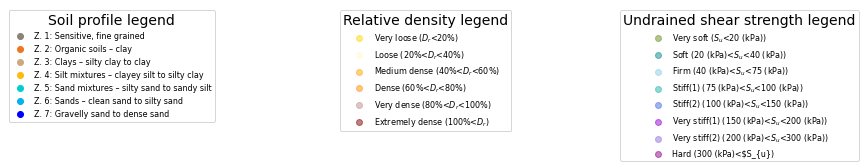

In [37]:
# Plotting:
outer_plot_count = 0; kkk = 0;
Out_num_row = 1; Out_num_col = 1 
In_num_row  = 1; In_num_col  = 3;

fig = plt.figure(figsize = ((15*Out_num_col), (2*Out_num_row)))
plt.rcParams.update({'font.size': 14})
fig.patch.set_facecolor('white')
fig.tight_layout()
outer = gridspec.GridSpec(Out_num_row, Out_num_col, wspace = 0.1, hspace = 0.35)

color_f = color_Bq_new;

Depth_cap = 70
lw = 2.5; SIZE = 5; FS = 16; 
plt.rcParams.update({'font.size': 14})

###############################################################################################################
###############################################################################################################
# First and second sub plots of the main figure to add legends for CPT and VC

# First subplot for CPT legends
leg_fsize = '8'; alpha_color = 0.5

COLOR_Su = ['olivedrab', 'darkcyan', 'skyblue', 'lightseagreen', 'royalblue', 'darkviolet', 'mediumpurple', 'darkmagenta']
    
Leg_Su   = ['Very soft ($S_{u}$<20 (kPa))', 'Soft (20 (kPa)<$S_{u}$<40 (kPa))', 'Firm (40 (kPa)<$S_{u}$<75 (kPa))', 'Stiff(1) (75 (kPa)<$S_{u}$<100 (kPa))', 'Stiff(2) (100 (kPa)<$S_{u}$<150 (kPa))', 'Very stiff(1) (150 (kPa)<$S_{u}$<200 (kPa))', 'Very stiff(2) (200 (kPa)<$S_{u}$<300 (kPa))', 'Hard (300 (kPa)<$S_{u})']

COLOR_Dr = ['gold', 'lemonchiffon', 'orange', 'darkorange', 'rosybrown', 'maroon']
Leg_Dr   = ['Very loose ($D_{r}$<20%)', 'Loose (20%<$D_{r}$<40%)', 'Medium dense (40%<$D_{r}$<60%)', 'Dense (60%<$D_{r}$<80%)', 'Very dense (80%<$D_{r}$<100%)', 'Extremely dense (100%<$D_{r}$)']

# plot: adding Legends as the first subplot of the outer plot

###############################################################################################################
inner = gridspec.GridSpecFromSubplotSpec(In_num_row, In_num_col,
                    subplot_spec=outer[outer_plot_count], wspace=0.5, hspace=0.05)

ax1_in = plt.Subplot(fig, inner[0])
ax1 = fig.add_subplot(ax1_in)


lines1 = len(COLOR_Bq) * ['']; lines2 = len(COLOR_Dr) * ['']; lines3 = len(COLOR_Su) * [''];
for j in range(len(COLOR_Bq)):
    lines1[j] = ax1.scatter([], [], facecolor = COLOR_Bq[j], edgecolor = COLOR_Bq[j], label = SBT_Bq[j]);

    
#lines1 = len(COLOR_Fr) * ['']; lines2 = len(COLOR_Dr) * ['']; lines3 = len(COLOR_Su) * [''];
#for j in range(len(COLOR_Fr)):
#    lines1[j] = ax1.scatter([], [], facecolor = COLOR_Fr[j], edgecolor = COLOR_Fr[j], label = SBT_Fr[j]);

###############################################################################################################
ax2_in = plt.Subplot(fig, inner[1])
ax2 = fig.add_subplot(ax2_in)

for j in range(len(COLOR_Dr)):
    lines2[j] = ax1.scatter([], [], facecolor = COLOR_Dr[j], edgecolor = COLOR_Dr[j], alpha=alpha_color);

###############################################################################################################    
ax3_in = plt.Subplot(fig, inner[2])
ax3 = fig.add_subplot(ax3_in)

for j in range(len(COLOR_Su)):
    lines3[j] = ax3.scatter([], [], facecolor = COLOR_Su[j], edgecolor = COLOR_Su[j], alpha=alpha_color);

leg1 = ax1.legend(               loc = 'upper center', title = "Soil profile legend"            , fontsize = leg_fsize);
leg2 = ax2.legend(lines2,Leg_Dr, loc = 'upper center', title = "Relative density legend"        , fontsize = leg_fsize);
leg3 = ax3.legend(lines3,Leg_Su, loc = 'upper center', title = "Undrained shear strength legend", fontsize = leg_fsize);

#ax1.add_artist(leg1);
#ax1.add_artist(leg2);
ax1.axis('off'); ax2.axis('off'); ax3.axis('off');
###############################################################################################################

#Path_save = 'C:/Ali/OFFSHORE PROJECRS/TOYO Japan/Driveability study/Figures/'
#plt.savefig(Path_save + 'Legends' + '.svg')
